# ИТОГ:
В виду отсутствия времени (через REST API предлагалось скачивать максимум по 20 облигаций за раз, причем питоновский список API не принимал, поэтому цикл по скачиванию облигаций сделать не получилось, а Exel у меня на Линуксе отсутствует) собрал основные датасеты через сайт и проверил полноту дефолтных предсказаний через REST API. Количество дефолтных организаций совпало. Собрал полученные датасеты и датасет облигаций перевел в датасет эмитентов. Через  REST API добавил признаки эмитентов (для добавления признаков облигаций через  REST API у меня не было внутреннего id и требуемых кодов). Но с сайта получилось собрать облигации с расширенным количеством признаков. Провел простейший EDA. Сгенерировал несколько на мой взгляд важных признаков, без которых потерялась бы определенная информация при преобразованиях. Сконкатенатил признаки с рейтингами.

In [1]:
import numpy as np
import pandas as pd
import requests
import json
import datetime

In [2]:
def fixing_nan(df, cnt_nan = 40):
    """ Функция создает колонки выявляющие признаки, 
    в которых количество None больше чем cnt_nan"""
    for col in df.columns:
        if df[col].isna().sum():
            df[f"{col}_nan"] = 1
            df[f"{col}_nan"] = df[f"{col}_nan"] * df[col].isna()
            if len(df.loc[df[f"{col}_nan"] == 1]) < cnt_nan:
                df.drop(columns=[f"{col}_nan"], inplace=True)

Bonds_Listing = pd.read_excel("Bonds_Listing.xlsx")
Bonds_Listing.T

Bonds_Listing.info()

Bonds_Listing.info()

Bonds_Listing.T

In [3]:
Bonds_default = pd.read_excel("Bonds_default2.xlsx")

In [4]:
Bonds_default.T

,0,1,2,3,4,5,6,7,8,9,...,148,149,150,151,152,153,154,155,156,157
Статус,Дефолт,Дефолт,Дефолт,Дефолт,Дефолт,Дефолт,Дефолт,Дефолт,Дефолт,Дефолт,...,Дефолт,Дефолт,Дефолт,Дефолт,Дефолт,Дефолт,Дефолт,Дефолт,Дефолт,Дефолт
"Состояние бумаги, eng.",Placed,Placed,Placed,NaN,Placed,NaN,NaN,NaN,Placed,Redeemed,...,NaN,NaN,Placed,Placed,Placed,Placed,Placed,NaN,NaN,NaN
Ломбардный список БР,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,0.0,0.0,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
Isin,RU000A0JTEM2,RU000A0JXZM9,RU000A0JUJW8,NaN,RU000A0JUF32,NaN,NaN,NaN,RU000A0JWV55,RU000A0JVAU9,...,NaN,NaN,RU000A1045V1,RU000A102ZS9,RU000A102101,RU000A100VY0,RU000A1014A1,NaN,NaN,NaN
Код НРД,RU000A0JTEM2,RU000A0JXZM9,RU000A0JUJW8,NaN,RU000A0JUF32,NaN,NaN,NaN,RU000A0JWV55,RU000A0JVAU9,...,NaN,NaN,RU000A1045V1,RU000A102ZS9,RU000A102101,RU000A100VY0,RU000A1014A1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Класс эмитента по выручке,NaN,Микро,Малый,NaN,NaN,Микро,NaN,NaN,NaN,NaN,...,NaN,NaN,Средний,Средний,Средний,Средний,Средний,NaN,NaN,NaN
Рейтинг агрег. Эксперт РА,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,ruD,ruD,ruD,ruD,ruD,NaN,NaN,NaN
Рейтинг эмиссии Эксперт РА,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Рейтинг агрег. АКРА,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
Bonds_default.T.head(20)

,0,1,2,3,4,5,6,7,8,9,...,148,149,150,151,152,153,154,155,156,157
Статус,Дефолт,Дефолт,Дефолт,Дефолт,Дефолт,Дефолт,Дефолт,Дефолт,Дефолт,Дефолт,...,Дефолт,Дефолт,Дефолт,Дефолт,Дефолт,Дефолт,Дефолт,Дефолт,Дефолт,Дефолт
"Состояние бумаги, eng.",Placed,Placed,Placed,NaN,Placed,NaN,NaN,NaN,Placed,Redeemed,...,NaN,NaN,Placed,Placed,Placed,Placed,Placed,NaN,NaN,NaN
Ломбардный список БР,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,0.0,0.0,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
Isin,RU000A0JTEM2,RU000A0JXZM9,RU000A0JUJW8,NaN,RU000A0JUF32,NaN,NaN,NaN,RU000A0JWV55,RU000A0JVAU9,...,NaN,NaN,RU000A1045V1,RU000A102ZS9,RU000A102101,RU000A100VY0,RU000A1014A1,NaN,NaN,NaN
Код НРД,RU000A0JTEM2,RU000A0JXZM9,RU000A0JUJW8,NaN,RU000A0JUF32,NaN,NaN,NaN,RU000A0JWV55,RU000A0JVAU9,...,NaN,NaN,RU000A1045V1,RU000A102ZS9,RU000A102101,RU000A100VY0,RU000A1014A1,NaN,NaN,NaN
Гос. рег. номер,4B02-01-00173-R,4B02-01-33722-D-002P,4-01-36438-R,4-01-28012-R,40100967B,4-01-28021-R,4-01-28023-R,4-01-28037-R,4-01-36500-R,4B020603261B,...,4-01-28026-R,4-01-28027-R,4B02-05-00360-R-001P,4B02-04-00360-R-001P,4B02-03-00360-R-001P,4B02-01-00360-R-001P,4B02-02-00360-R-001P,4-01-28060-R,4-01-28025-R,4-01-28014-R
"Номер гос. рег., НРД",4B02-01-00173-R,4B02-01-33722-D-002P,4-01-36438-R,NaN,40100967B,NaN,NaN,NaN,4-01-36500-R,4B020603261B,...,NaN,NaN,4B02-05-00360-R-001P,4B02-04-00360-R-001P,4B02-03-00360-R-001P,4B02-01-00360-R-001P,4B02-02-00360-R-001P,NaN,NaN,NaN
Наименование,АгроКомплекс-1-боб,СибирскГостинец-2Р-01-боб,Арчер Финанс-1-об,БАЙРЯК-АЛТЫН-1-об,Балтика АКБ-1-об,БЕРКЕТ-АЛТЫН-1-об,БИЗЭК-АЛТЫН-1-об,БУХАР-АЛТЫН-1-об,Велес-1-об,Внешпромбанк-6-боб,...,ШУГАН-АЛТЫН-1-об,ШУРАН-АЛТЫН-1-об,ЭБИС-БО-П05,ЭБИС-БО-П04,ЭБИС-БО-П03,ЭБИС-БО-П01,ЭБИС-БО-П02,Электра-1-об,ЮРАШ-АЛТЫН-1-об,ЯМАЛЫ-АЛТЫН-1-об
CFI,DBVUFB,DBFUFB,DBVGFB,NaN,DCFUFB,NaN,NaN,NaN,DBVGFB,DBVXXB,...,NaN,NaN,DBFUFB,DBFUFB,DBFUFB,DBVUFB,DBFUFB,NaN,NaN,NaN
Страна заемщика,RU,RU,RU,RU,RU,RU,RU,RU,RU,RU,...,RU,RU,RU,RU,RU,RU,RU,RU,RU,RU


In [6]:
Bonds_default.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 84 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Статус                               158 non-null    object        
 1   Состояние бумаги, eng.               124 non-null    object        
 2   Ломбардный список БР                 124 non-null    float64       
 3   Isin                                 126 non-null    object        
 4   Код НРД                              124 non-null    object        
 5   Гос. рег. номер                      158 non-null    object        
 6   Номер гос. рег., НРД                 124 non-null    object        
 7   Наименование                         158 non-null    object        
 8   CFI                                  126 non-null    object        
 9   Страна заемщика                      158 non-null    object        
 10  Сектор заемщик

Bonds_Listing.info()

In [7]:
Bonds_default['Эмитент'].nunique()

88

In [8]:
Bonds_Listing2 = pd.read_excel("Bonds_Listing2.xlsx")
Bonds_Listing2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1448 entries, 0 to 1447
Data columns (total 84 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Статус                               1448 non-null   object        
 1   Состояние бумаги, eng.               1409 non-null   object        
 2   Ломбардный список БР                 1409 non-null   float64       
 3   Isin                                 1411 non-null   object        
 4   Код НРД                              1409 non-null   object        
 5   Гос. рег. номер                      1448 non-null   object        
 6   Номер гос. рег., НРД                 1409 non-null   object        
 7   Наименование                         1448 non-null   object        
 8   CFI                                  1409 non-null   object        
 9   Страна заемщика                      1448 non-null   object        
 10  Сектор заемщ

In [9]:
Bonds_Listing2.Эмитент.nunique()

490

In [10]:
Bonds_Listing2['target'] = 0

In [11]:
Bonds_default['target'] = 1

In [12]:
df = pd.concat([Bonds_Listing2, Bonds_default])

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1606 entries, 0 to 157
Data columns (total 85 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Статус                               1606 non-null   object        
 1   Состояние бумаги, eng.               1533 non-null   object        
 2   Ломбардный список БР                 1533 non-null   float64       
 3   Isin                                 1537 non-null   object        
 4   Код НРД                              1533 non-null   object        
 5   Гос. рег. номер                      1606 non-null   object        
 6   Номер гос. рег., НРД                 1533 non-null   object        
 7   Наименование                         1606 non-null   object        
 8   CFI                                  1535 non-null   object        
 9   Страна заемщика                      1606 non-null   object        
 10  Сектор заемщи

df['Рейтинг агрег. Эксперт РА'].fillna('NONE', inplace=True)
df['Рейтинг эмиссии Эксперт РА'].fillna('NONE', inplace=True)
df['Рейтинг агрег. АКРА'].fillna('NONE', inplace=True)
df['Рейтинг эмиссии АКРА'].fillna('NONE', inplace=True)

df['Рейтинг агрег'] = None

df['Рейтинг агрег. Эксперт РА']

# if тупо сплюсовать эти колонки получается каша, можно еще попробовать отдать преимущество АКРА
df['Рейтинг агрег'] = df.apply(lambda x: x['Рейтинг агрег. Эксперт РА'] if\
        x['Рейтинг агрег. Эксперт РА'] != 'NONE' else x['Рейтинг агрег. АКРА'], axis=1)

df['Рейтинг эмиссии'] = df.apply(lambda x: x['Рейтинг эмиссии Эксперт РА'] if\
        x['Рейтинг эмиссии Эксперт РА'] != 'NONE' else x['Рейтинг эмиссии АКРА'], axis=1)

df.drop(columns=['Рейтинг агрег. Эксперт РА', 'Рейтинг агрег. АКРА', 
                'Рейтинг эмиссии Эксперт РА', 'Рейтинг эмиссии АКРА'], inplace=True)

df['Рейтинг агрег'] = df['Рейтинг агрег'].apply(lambda x: None if x=="NONE" else x)
df['Рейтинг эмиссии'] = df['Рейтинг эмиссии'].apply(lambda x: None if x=="NONE" else x)

In [13]:
df.reset_index(drop=True, inplace=True)

fixing_nan(df, cnt_nan = 40)

In [14]:
df.columns[30:]

Index(['Дата ближ. объявления неизв. купона', 'Доходность эффект., %',
       'Доходность средневзв., %', 'НКД, в вал. ном.', 'Z-спред', 'Номинал',
       'Цена, %', 'Объем эмиссии, шт.', 'Заявл. объем эмиссии, в вал. ном.',
       'Объем в обращении, в вал. ном', 'Дневной оборот на МБ',
       'Средний дневной оборот за мес.', 'Объем торгов',
       'Объем торгов за 2 дня', 'Объем торгов за 5 дней',
       'Объем торгов за 10 дней', 'Объем торгов за месяц', 'Кол-во сделок',
       'Кол-во сделок за 2 дня', 'Кол-во сделок за 5 дней',
       'Кол-во сделок за 10 дней', 'Кол-во сделок за месяц',
       'Кол-во дней со сделками за 2 дня', 'Кол-во дней со сделками за 5 дней',
       'Кол-во дней со сделками за 10 дней',
       'Кол-во дней со сделками за месяц', 'Тип купона', 'Ставка купона, %',
       'Кол-во купонов в год', 'Валюта номинала', 'Тип облигации',
       'Вид облигации', 'Для неквал. инвесторов', 'Форма выпуска, eng',
       'Способ размещения', 'Тип по классиф. БР', 'Вид зал

In [15]:
df.Isin.isna().sum()

69

In [16]:
reg_list = list(df.loc[df['Isin'].isna()==True]['Гос. рег. номер'])

In [17]:
reg_list[:5]

['4-02-00207-A', '4-01-28045-R', '40102312B', '4-01-28046-R', '4-01-28044-R']

Проверил из этого списка Гос. рег. номера на этом сайте: действительно у этих облигаций нет ISIN. Но, блин, потерять 32 из 158 дефолтных облигаций в нашем случае не позволительно. Да и потом определить скор таких облигаций не получится, если алгоритм на них не обучится. А это 20% от всех дефолтных облигаций.

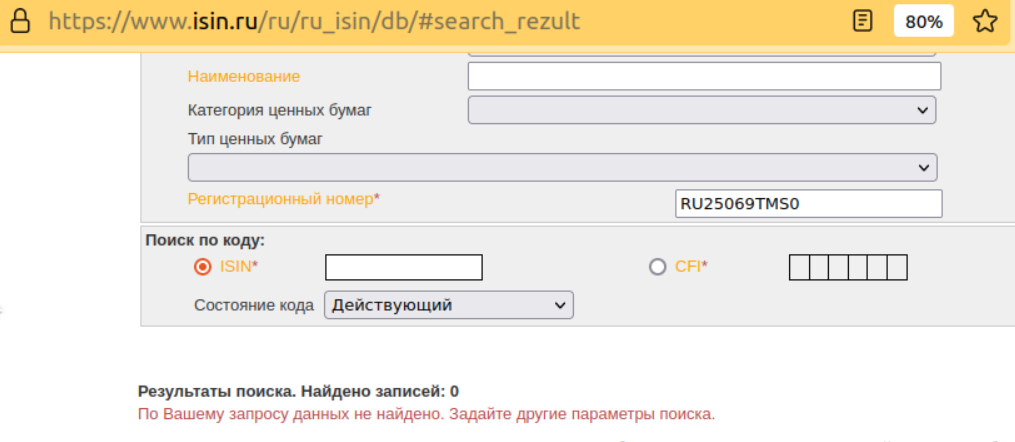

Поскольку по Гос. рег. номеру из АПИ данные не получить, в моем случае получить дополнительные признаки по облигациям не получится. Чтобы все получить, надо через АПИ скачивать по 20 облигаций. Это нереально долго. Создам признак того, что у облигации нет ISIN.

In [18]:
df['not_isin'] = 0
df.loc[df['Isin'].isna()==True, 'not_isin'] = 1

In [19]:
df.columns

Index(['Статус', 'Состояние бумаги, eng.', 'Ломбардный список БР', 'Isin',
       'Код НРД', 'Гос. рег. номер', 'Номер гос. рег., НРД', 'Наименование',
       'CFI', 'Страна заемщика', 'Сектор заемщика', 'Эмитент',
       'Страна эмиссии', 'Страна эмитента', 'Регион эмитента',
       'Сектор эмитента', 'Эмитент: реестр МСП', 'Страна риска',
       'Дюрация, лет', 'Дюрация модиф., лет', 'Дата ближ. возм. погаш.',
       'Дата погашения', 'Дата ближ. оферты', 'Дата начала размещения',
       'Дата окончания размещения', 'Дата регистрации',
       'Дата гос. рег-ции/присвоения', 'Срок обращения',
       'Дата начала 1-го купона', 'Дата ближ. купона',
       'Дата ближ. объявления неизв. купона', 'Доходность эффект., %',
       'Доходность средневзв., %', 'НКД, в вал. ном.', 'Z-спред', 'Номинал',
       'Цена, %', 'Объем эмиссии, шт.', 'Заявл. объем эмиссии, в вал. ном.',
       'Объем в обращении, в вал. ном', 'Дневной оборот на МБ',
       'Средний дневной оборот за мес.', 'Объем торгов'

In [20]:
(df['Isin'] == df['Код НРД']).sum()

1474

In [21]:
df.drop_duplicates(keep='first', inplace=False, ignore_index=True)

,Статус,"Состояние бумаги, eng.",Ломбардный список БР,Isin,Код НРД,Гос. рег. номер,"Номер гос. рег., НРД",Наименование,CFI,Страна заемщика,...,"Тип бумаги (МСП, Корп., Гос.)",Сектор повышенного инвест. риска,Сектор роста,Класс эмитента по выручке,Рейтинг агрег. Эксперт РА,Рейтинг эмиссии Эксперт РА,Рейтинг агрег. АКРА,Рейтинг эмиссии АКРА,target,not_isin
0,В обращении,Placed,0.0,RU000A100ZX3,RU000A100ZX3,4CDE-02-00503-R,4CDE-02-00503-R,2М-КО-02,DBVUFB,RU,...,M,НЕТ,НЕТ,Малый,NaN,NaN,NaN,NaN,0,0
1,В обращении,Placed,0.0,RU000A0ZYXK2,RU000A0ZYXK2,4CDE-01-00370-R,4CDE-01-00370-R,2М-КО-01,DBVUFB,RU,...,M,НЕТ,НЕТ,Малый,NaN,NaN,NaN,NaN,0,0
2,В обращении,Placed,0.0,RU000A103ML0,RU000A103ML0,4CDE-01-00041-L-001P,4CDE-01-00041-L-001P,4К-KO1,DBFUFB,RU,...,M,НЕТ,НЕТ,Микро,NaN,NaN,NaN,NaN,0,0
3,В обращении,Placed,0.0,RU000A104FX7,RU000A104FX7,4-01-00627-R,4-01-00627-R,А Девелопмент-01-об,DBFUFB,RU,...,M,НЕТ,НЕТ,Микро,NaN,NaN,NaN,NaN,0,0
4,В обращении,Placed,0.0,RU000A100LG8,RU000A100LG8,4CDE-02-00411-R,4CDE-02-00411-R,А7 Агро-КО-02,DBVGFB,RU,...,M,НЕТ,НЕТ,Малый,NaN,NaN,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1601,Дефолт,Placed,0.0,RU000A100VY0,RU000A100VY0,4B02-01-00360-R-001P,4B02-01-00360-R-001P,ЭБИС-БО-П01,DBVUFB,RU,...,M,НЕТ,НЕТ,Средний,ruD,NaN,NaN,NaN,1,0
1602,Дефолт,Placed,0.0,RU000A1014A1,RU000A1014A1,4B02-02-00360-R-001P,4B02-02-00360-R-001P,ЭБИС-БО-П02,DBFUFB,RU,...,M,НЕТ,НЕТ,Средний,ruD,NaN,NaN,NaN,1,0
1603,Дефолт,NaN,NaN,NaN,NaN,4-01-28060-R,NaN,Электра-1-об,NaN,RU,...,M,НЕТ,НЕТ,NaN,NaN,NaN,NaN,NaN,1,1
1604,Дефолт,NaN,NaN,NaN,NaN,4-01-28025-R,NaN,ЮРАШ-АЛТЫН-1-об,NaN,RU,...,M,НЕТ,НЕТ,NaN,NaN,NaN,NaN,NaN,1,1


In [22]:
df.loc[df['target']==1]['Эмитент'].nunique()

88

In [23]:
df.loc[df['target']==0]['Эмитент'].nunique()

490

In [24]:
df['Эмитент'].nunique()

573

В дефолтных облигациях по одному эмитенту. Значит, чтобы сравнивать их с недефолтными, недефолтные нельзя агрегировать по эмитенту. Оставлю по эмитентам самые свежие облигации. Но для сохранения информации создам признак: сколько у эмитента облигаций.

In [25]:
pd.DataFrame(df.groupby('Эмитент')['Дата начала размещения'].max()).merge(df, 
                        how='left', on=['Эмитент', 'Дата начала размещения'])['target'].value_counts()

0    519
1     88
Name: target, dtype: int64

In [26]:
cnt_bonds = pd.DataFrame(df.groupby('Эмитент')['Статус'].count()).rename(columns={"Статус": "cnt_bonds"}, errors="raise")
cnt_bonds

,cnt_bonds
Эмитент,
2М,2
4К,1
А Девелопмент,1
А7 Агро,3
АБЗ-1,3
...,...
ЮниСервис Капитал,1
ЯМАЛЫ-АЛТЫН,1
ЯТЭК,2


In [27]:
df = df.merge(cnt_bonds, how='left', on=['Эмитент'])

In [28]:
df_maxdate = pd.DataFrame(df.groupby('Эмитент')['Дата начала размещения'].max()).merge(df, 
                        how='left', on=['Эмитент', 'Дата начала размещения'])
df_maxdate.shape

(607, 87)

In [29]:
df_mindate = pd.DataFrame(df.groupby('Эмитент')['Дата начала размещения'].min()).merge(df, 
                        how='left', on=['Эмитент', 'Дата начала размещения'])
df_mindate.shape

(616, 87)

In [30]:
df_maxdate.iloc[:, 0:90].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 0 to 606
Data columns (total 87 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Эмитент                              607 non-null    object        
 1   Дата начала размещения               607 non-null    datetime64[ns]
 2   Статус                               607 non-null    object        
 3   Состояние бумаги, eng.               548 non-null    object        
 4   Ломбардный список БР                 548 non-null    float64       
 5   Isin                                 550 non-null    object        
 6   Код НРД                              548 non-null    object        
 7   Гос. рег. номер                      607 non-null    object        
 8   Номер гос. рег., НРД                 548 non-null    object        
 9   Наименование                         607 non-null    object        
 10  CFI           

In [31]:
df_mindate.iloc[:, 0:90].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 616 entries, 0 to 615
Data columns (total 87 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Эмитент                              616 non-null    object        
 1   Дата начала размещения               616 non-null    datetime64[ns]
 2   Статус                               616 non-null    object        
 3   Состояние бумаги, eng.               557 non-null    object        
 4   Ломбардный список БР                 557 non-null    float64       
 5   Isin                                 559 non-null    object        
 6   Код НРД                              557 non-null    object        
 7   Гос. рег. номер                      616 non-null    object        
 8   Номер гос. рег., НРД                 557 non-null    object        
 9   Наименование                         616 non-null    object        
 10  CFI           

Важных нанов меньше в df_maxdate, выбираю его.

In [32]:
df_maxdate

,Эмитент,Дата начала размещения,Статус,"Состояние бумаги, eng.",Ломбардный список БР,Isin,Код НРД,Гос. рег. номер,"Номер гос. рег., НРД",Наименование,...,Сектор повышенного инвест. риска,Сектор роста,Класс эмитента по выручке,Рейтинг агрег. Эксперт РА,Рейтинг эмиссии Эксперт РА,Рейтинг агрег. АКРА,Рейтинг эмиссии АКРА,target,not_isin,cnt_bonds
0,2М,2019-11-05,В обращении,Placed,0.0,RU000A100ZX3,RU000A100ZX3,4CDE-02-00503-R,4CDE-02-00503-R,2М-КО-02,...,НЕТ,НЕТ,Малый,NaN,NaN,NaN,NaN,0,0,2
1,4К,2021-09-02,В обращении,Placed,0.0,RU000A103ML0,RU000A103ML0,4CDE-01-00041-L-001P,4CDE-01-00041-L-001P,4К-KO1,...,НЕТ,НЕТ,Микро,NaN,NaN,NaN,NaN,0,0,1
2,А Девелопмент,2022-01-27,В обращении,Placed,0.0,RU000A104FX7,RU000A104FX7,4-01-00627-R,4-01-00627-R,А Девелопмент-01-об,...,НЕТ,НЕТ,Микро,NaN,NaN,NaN,NaN,0,0,1
3,А7 Агро,2019-08-15,В обращении,Placed,0.0,RU000A100QH5,RU000A100QH5,4CDE-03-00411-R,4CDE-03-00411-R,А7 Агро-КО-03,...,НЕТ,НЕТ,Малый,NaN,NaN,NaN,NaN,0,0,3
4,АБЗ-1,2023-02-02,В обращении,Placed,0.0,RU000A105SX7,RU000A105SX7,4B02-03-01671-D-001P,4B02-03-01671-D-001P,АБЗ-1-001Р-03-боб,...,НЕТ,НЕТ,NaN,NaN,NaN,BBB(RU),BBB(RU),0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,ЮниСервис Капитал,2021-03-04,В обращении,Placed,0.0,RU000A102TK9,RU000A102TK9,4-02-00534-R,4-02-00534-R,ЮниСервис Капитал-02К-об,...,НЕТ,НЕТ,Микро,NaN,NaN,NaN,NaN,0,0,1
603,ЯМАЛЫ-АЛТЫН,2009-07-23,Дефолт,NaN,NaN,NaN,NaN,4-01-28014-R,NaN,ЯМАЛЫ-АЛТЫН-1-об,...,НЕТ,НЕТ,NaN,NaN,NaN,NaN,NaN,1,1,1
604,ЯТЭК,2021-04-12,В обращении,Placed,0.0,RU000A102ZH2,RU000A102ZH2,4B02-02-20510-F-001P,4B02-02-20510-F-001P,ЯТЭК-001Р-02,...,НЕТ,НЕТ,NaN,NaN,NaN,A(RU),A(RU),0,0,2
605,Ямал СПГ,2015-11-23,В обращении,Placed,0.0,RU000A0JVYR5,RU000A0JVYR5,4-02-10428-A,4-02-10428-A,Ямал СПГ-2-об,...,НЕТ,НЕТ,Крупный,NaN,NaN,NaN,NaN,0,0,2


In [33]:
df_maxdate['Эмитент'].nunique()

573

Видимо есть облигации с одной датой.

In [34]:
drop_duplicats = df_maxdate['Эмитент'].drop_duplicates()
drop_duplicats[:5]

0               2М
1               4К
2    А Девелопмент
3          А7 Агро
4            АБЗ-1
Name: Эмитент, dtype: object

In [36]:
drop_duplicats.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            597, 598, 599, 600, 601, 602, 603, 604, 605, 606],
           dtype='int64', length=573)

In [38]:
df_maxdate = df_maxdate.loc[drop_duplicats.index,
            df_maxdate.columns]

In [53]:
df_maxdate

,Эмитент,Дата начала размещения,Статус,"Состояние бумаги, eng.",Ломбардный список БР,Isin,Код НРД,Гос. рег. номер,"Номер гос. рег., НРД",Наименование,...,Сектор повышенного инвест. риска,Сектор роста,Класс эмитента по выручке,Рейтинг агрег. Эксперт РА,Рейтинг эмиссии Эксперт РА,Рейтинг агрег. АКРА,Рейтинг эмиссии АКРА,target,not_isin,cnt_bonds
0,2М,2019-11-05,В обращении,Placed,0.0,RU000A100ZX3,RU000A100ZX3,4CDE-02-00503-R,4CDE-02-00503-R,2М-КО-02,...,НЕТ,НЕТ,Малый,NaN,NaN,NaN,NaN,0,0,2
1,4К,2021-09-02,В обращении,Placed,0.0,RU000A103ML0,RU000A103ML0,4CDE-01-00041-L-001P,4CDE-01-00041-L-001P,4К-KO1,...,НЕТ,НЕТ,Микро,NaN,NaN,NaN,NaN,0,0,1
2,А Девелопмент,2022-01-27,В обращении,Placed,0.0,RU000A104FX7,RU000A104FX7,4-01-00627-R,4-01-00627-R,А Девелопмент-01-об,...,НЕТ,НЕТ,Микро,NaN,NaN,NaN,NaN,0,0,1
3,А7 Агро,2019-08-15,В обращении,Placed,0.0,RU000A100QH5,RU000A100QH5,4CDE-03-00411-R,4CDE-03-00411-R,А7 Агро-КО-03,...,НЕТ,НЕТ,Малый,NaN,NaN,NaN,NaN,0,0,3
4,АБЗ-1,2023-02-02,В обращении,Placed,0.0,RU000A105SX7,RU000A105SX7,4B02-03-01671-D-001P,4B02-03-01671-D-001P,АБЗ-1-001Р-03-боб,...,НЕТ,НЕТ,NaN,NaN,NaN,BBB(RU),BBB(RU),0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,ЮниСервис Капитал,2021-03-04,В обращении,Placed,0.0,RU000A102TK9,RU000A102TK9,4-02-00534-R,4-02-00534-R,ЮниСервис Капитал-02К-об,...,НЕТ,НЕТ,Микро,NaN,NaN,NaN,NaN,0,0,1
603,ЯМАЛЫ-АЛТЫН,2009-07-23,Дефолт,NaN,NaN,NaN,NaN,4-01-28014-R,NaN,ЯМАЛЫ-АЛТЫН-1-об,...,НЕТ,НЕТ,NaN,NaN,NaN,NaN,NaN,1,1,1
604,ЯТЭК,2021-04-12,В обращении,Placed,0.0,RU000A102ZH2,RU000A102ZH2,4B02-02-20510-F-001P,4B02-02-20510-F-001P,ЯТЭК-001Р-02,...,НЕТ,НЕТ,NaN,NaN,NaN,A(RU),A(RU),0,0,2
605,Ямал СПГ,2015-11-23,В обращении,Placed,0.0,RU000A0JVYR5,RU000A0JVYR5,4-02-10428-A,4-02-10428-A,Ямал СПГ-2-об,...,НЕТ,НЕТ,Крупный,NaN,NaN,NaN,NaN,0,0,2


# Using API

In [167]:
api_url = 'https://dh2.efir-net.ru/v2'
api_login = 'hackathon-test32'
api_pass = '963kMF'

# Функция сформировать запрос
def doPostRequest(url, body, token):
    if (token is None):
        headers = {'Content-Type': 'application/json'}
    else:
        headers = {'authorization': 'Bearer ' + token, 'Content-Type': 'application/json'}
    response = requests.post(url, json=body, headers=headers)
    if response.status_code == 200:
        return response.json()
    return None

# получаем токен
def getToken(login, password):
    url = api_url+'/Account/Login'
    body = {
        'login': login, 
        'password': password }

    token = doPostRequest(url, body, None)
    if token is None:
        return None
    print ('token - OK!')
    return token['token']

# Получаем токен, получить нужно один раз.
token = getToken(api_login, api_pass)

token - OK!


In [168]:
token

'eyJhbGciOiJSUzI1NiIsInR5cCI6IkpXVCJ9.eyJuYmYiOjE2Nzg1MzE1NzUsImV4cCI6MTY3ODYxNzk3NSwiaXNzIjoiaHR0cDovL2lkZW50aXR5LmNvbW1vbjo1MDAwIiwiYXVkIjpbImh0dHA6Ly9pZGVudGl0eS5jb21tb246NTAwMC9yZXNvdXJjZXMiLCJkYXRhSHViMiIsImV4Y2VsLmFkZGluIiwibmV3cy5zZXJ2aWNlIl0sImNsaWVudF9pZCI6ImRhdGFodWIiLCJzdWIiOiIzMzMwMjAiLCJhdXRoX3RpbWUiOjE2Nzg1MzE1NzUsImlkcCI6ImxvY2FsIiwiVXNlcklkIjoiMzMzMDIwIiwiU2Vzc2lvbklkIjoidW5pY2tpZF87KV80OTIyMDU0ODNfMTEwMzIzIDEzNDYxNV9fIiwiVXNlcklwQWRkcmVzc1BvcnQiOiIxMC40Mi45MC40NzozODkxMiIsIkxvZ2luIjoiaGFja2F0aG9uLXRlc3QzMiIsIlJvbGVzIjpbInJ1ZGF0YS53ZWIiLCJydXNib25kcy53ZWIiLCJydWRhdGEuY29ycF9hY3Rpb25zIiwicnVkYXRhLm5ld3MiLCJkYXRhaHViLmFwaSIsImV4Y2VsLmFkZGluIiwicnVkYXRhLmNhbGVuZGFyIiwicnVkYXRhLnJhdGluZ3MiXSwic2NvcGUiOlsiZGF0YUh1YjIiLCJleGNlbC5hZGRpbiIsIm5ld3Muc2VydmljZSJdLCJhbXIiOlsicHdkIl19.1iauK7gI1YUc3CGdfaSEH7MjLQgRq7Qh4fxEEBp7JIG5hfJKylHiL5Wryil9SIGjObX8xe4nO5kKZFtLU6fDRlv8fcH1VY4rks0uLLQA9lIYxsMlaTJhuWocPyIZcRtS_DaFqE32qM6O5UhabKYFhhHbk1cYnU3rD9DnCyZSUMWNOMLgV5fxIfGxyB6ODYWxmlQyc90W_

In [41]:
df_maxdate['Эмитент'].tolist()[:100]

['2М',
 '4К',
 'А Девелопмент',
 'А7 Агро',
 'АБЗ-1',
 'АВТОБАН-Финанс',
 'АВТОДОМ',
 'АК БАРС Банк',
 'АО им. Т.Г. Шевченко',
 'АПРИ Флай Плэнинг',
 'АС ФИНАНС',
 'Авангард АКБ',
 'Авангард-Агро',
 'Автодор ГК',
 'Автоэкспресс',
 'АгроКомплекс',
 'АгроКубань Ресурс',
 'Агротек',
 'Агрохолдинг Солтон',
 'Азот Кемерово',
 'АйДи Коллект',
 'Айс стим Рус',
 'Аквилон-Лизинг',
 'Акрон',
 'Альфа-Банк',
 'Антерра',
 'Аптечная сеть 36.6',
 'Арагон',
 'Аренза-Про',
 'Арчер Финанс',
 'Аспэк-Домстрой',
 'Атомстройкомплекс-Строит',
 'Ашинский МетЗд',
 'Аэрофлот',
 'Аэрофьюэлз',
 'БАЙРЯК-АЛТЫН',
 'ББР Банк',
 'БЕРКЕТ-АЛТЫН',
 'БИЗЭК-АЛТЫН',
 'БКЕ',
 'БКС Банк',
 'БСПБ 2 ИА',
 'БУХАР-АЛТЫН',
 'Баксинформ',
 'Балтийский лизинг ООО',
 'Балтика АКБ',
 'Банк Аверс',
 'Банк ВБРР',
 'Банк ВТБ',
 'Банк ГПБ',
 'Банк ДОМ.РФ',
 'Банк Зенит',
 'Банк НационалСтандарт',
 'Банк ФК Открытие',
 'БашкирскаяСодоваяКомп',
 'Белгородская Обл Прав',
 'Белуга Групп',
 'Бизнес-Недвижимость',
 'Биннофарм Групп',
 'Биоэнерг

In [54]:
# Поиск эмитента по списку кодов (fininstId, ИНН, ОГРН, shortname)
def Find_Emitent(token):
    url = api_url+'/Emitent/Find'
    body = {
            "codes": [
              '2М',
 '4К',
 'А Девелопмент',
 'А7 Агро',
 'АБЗ-1',
 'АВТОБАН-Финанс',
 'АВТОДОМ',
 'АК БАРС Банк',
 'АО им. Т.Г. Шевченко',
 'АПРИ Флай Плэнинг',
 'АС ФИНАНС',
 'Авангард АКБ',
 'Авангард-Агро',
 'Автодор ГК',
 'Автоэкспресс',
 'АгроКомплекс',
 'АгроКубань Ресурс',
 'Агротек',
 'Агрохолдинг Солтон',
 'Азот Кемерово',
 'АйДи Коллект',
 'Айс стим Рус',
 'Аквилон-Лизинг',
 'Акрон',
 'Альфа-Банк',
 'Антерра',
 'Аптечная сеть 36.6',
 'Арагон',
 'Аренза-Про',
 'Арчер Финанс',
 'Аспэк-Домстрой',
 'Атомстройкомплекс-Строит',
 'Ашинский МетЗд',
 'Аэрофлот',
 'Аэрофьюэлз',
 'БАЙРЯК-АЛТЫН',
 'ББР Банк',
 'БЕРКЕТ-АЛТЫН',
 'БИЗЭК-АЛТЫН',
 'БКЕ',
 'БКС Банк',
 'БСПБ 2 ИА',
 'БУХАР-АЛТЫН',
 'Баксинформ',
 'Балтийский лизинг ООО',
 'Балтика АКБ',
 'Банк Аверс',
 'Банк ВБРР',
 'Банк ВТБ',
 'Банк ГПБ',
 'Банк ДОМ.РФ',
 'Банк Зенит',
 'Банк НационалСтандарт',
 'Банк ФК Открытие',
 'БашкирскаяСодоваяКомп',
 'Белгородская Обл Прав',
 'Белуга Групп',
 'Бизнес-Недвижимость',
 'Биннофарм Групп',
 'Биоэнерго',
 'Бифорком Тек',
 'Борец Капитал',
 'Боржоми Финанс',
 'Брайт Финанс',
 'Брусника',
 'Быстроденьги МФК',
 'Бэлти-Гранд',
 'ВИС ФИНАНС',
 'ВОЛГА Капитал',
 'ВТБ СырьевТовары Фин',
 'ВУШ',
 'ВЭБ-лизинг',
 'Вангор Капитал',
 'Вега ООО',
 'Велес',
 'Вересаева 6',
 'Вертолеты России',
 'ВерхнебаканЦементЗд',
 'Вита Лайн',
 'Внешпромбанк',
 'Волга-Спорт',
 'ВосточнаяСК',
 'Восточно-СибирскийИА2012',
 'ВсеИнструменты.ру',
 'ВымпелКом',
 'Вэббанкир МФК',
 'ГСП-Финанс',
 'ГТЛК',
 'Гидромашсервис',
 'Главная дорога',
 'Главстрой',
 'Главторг',
 'ГлобалФакторингНетворкРус',
 'Глоракс',
 'Голдман Групп УК',
 'Городской супермаркет',
 'Гранолюкс',
 'Группа Астон',
 'Группа ЛСР',
 'Группа Продовольствие'
            ]
          }

    return doPostRequest(url, body, token)

df_Find_Emitent = pd.DataFrame(Find_Emitent(token))

print (f'Число записей:{df_Find_Emitent.shape[0]}')
df_Find_Emitent.tail(10)

Число записей:100


,fininstId,inn,ogrn,shortname_rus,shortname_eng
90,116326,7814505170,1117847263940,А Девелопмент,None
91,110230,7708797121,1137746850977,Бизнес-Недвижимость,None
92,7152,7725038124,1037739527077,Банк ДОМ.РФ,None
93,121641,4100006268,1024101024694,Агротек,None
94,6488,7713076301,1027700166636,ВымпелКом,VYMPELKOM
95,120205,9717068640,1187746542180,ВУШ,None
96,93616,7709413138,1037709024781,ВЭБ-лизинг,None
97,92472,2315076504,1022302385808,ВерхнебаканЦементЗд,Verkhnebakanskij tsementnyj zavod
98,43571,7401000473,1027400508277,Ашинский МетЗд,Ashinskiy metzavod
99,122763,9731098069,1227700520959,Борец Капитал,None


In [43]:
df_maxdate['Эмитент'].tolist()[100:200]

['Группа Черкизово',
 'ДЕМИУРГ',
 'ДУБЪЯЗ-АЛТЫН',
 'ДелоПортс',
 'Дельта-Финанс',
 'Деметра-Холдинг',
 'ДепФинансов ТомсОбл',
 'ДепФинансов ЯрославОбл',
 'Держава АКБ',
 'Детский мир',
 'Джи-групп',
 'Диджитал Инвест',
 'Диомидовский рыбный порт',
 'ДиректЛизинг',
 'Домашние деньги',
 'Доминион УК',
 'Домо',
 'Домодедово ФьюэлФасилитис',
 'Дон ГКК',
 'Донской ломбард',
 'Дэни Колл',
 'Дядя Дёнер',
 'ЕКС ГК',
 'ЕвразХолдинг Финанс',
 'ЕвроСибЭнерго-Гидро',
 'ЕвроТранс',
 'ЕвроХим МХК',
 'Европлан ЛК',
 'Еврофинансы-Недвижимость',
 'Ерыклы-Алтын',
 'ЖКХ РС(Я)',
 'Жилой микрорайон',
 'ЗАЙМЕР МФК',
 'Завод КЭС',
 'Западный проект СФО',
 'ИА Абсолют 5',
 'ИА ТБ-1',
 'ИА Титан-3',
 'ИА Титан-5',
 'ИМПЕКС',
 'ИНГРАД (ПАО)',
 'ИНК-Капитал',
 'ИС Петролеум',
 'ИСК Петроинжиниринг',
 'ИСКЧ',
 'ИТК Оптима',
 'ИФК СОЮЗ',
 'ИЭК Холдинг',
 'Ибрай-Алтын',
 'Измеритель Финанс',
 'Инарктика',
 'Инвест-девелопмент',
 'ИнвестКредит Финанс СФО',
 'ИнвестФинКомпания СКВ',
 'Инвестпро',
 'Инкаб',
 'Инсайт И

In [55]:
# Поиск эмитента по списку кодов (fininstId, ИНН, ОГРН, shortname)
def Find_Emitent(token):
    url = api_url+'/Emitent/Find'
    body = {
            "codes": [
              'Группа Черкизово',
 'ДЕМИУРГ',
 'ДУБЪЯЗ-АЛТЫН',
 'ДелоПортс',
 'Дельта-Финанс',
 'Деметра-Холдинг',
 'ДепФинансов ТомсОбл',
 'ДепФинансов ЯрославОбл',
 'Держава АКБ',
 'Детский мир',
 'Джи-групп',
 'Диджитал Инвест',
 'Диомидовский рыбный порт',
 'ДиректЛизинг',
 'Домашние деньги',
 'Доминион УК',
 'Домо',
 'Домодедово ФьюэлФасилитис',
 'Дон ГКК',
 'Донской ломбард',
 'Дэни Колл',
 'Дядя Дёнер',
 'ЕКС ГК',
 'ЕвразХолдинг Финанс',
 'ЕвроСибЭнерго-Гидро',
 'ЕвроТранс',
 'ЕвроХим МХК',
 'Европлан ЛК',
 'Еврофинансы-Недвижимость',
 'Ерыклы-Алтын',
 'ЖКХ РС(Я)',
 'Жилой микрорайон',
 'ЗАЙМЕР МФК',
 'Завод КЭС',
 'Западный проект СФО',
 'ИА Абсолют 5',
 'ИА ТБ-1',
 'ИА Титан-3',
 'ИА Титан-5',
 'ИМПЕКС',
 'ИНГРАД (ПАО)',
 'ИНК-Капитал',
 'ИС Петролеум',
 'ИСК Петроинжиниринг',
 'ИСКЧ',
 'ИТК Оптима',
 'ИФК СОЮЗ',
 'ИЭК Холдинг',
 'Ибрай-Алтын',
 'Измеритель Финанс',
 'Инарктика',
 'Инвест-девелопмент',
 'ИнвестКредит Финанс СФО',
 'ИнвестФинКомпания СКВ',
 'Инвестпро',
 'Инкаб',
 'Инсайт ИГ',
 'Интерлизинг',
 'Интерпромбанк КБ',
 'ИнфраструктурИнвестиции-4',
 'Иркут НПК',
 'КАМАЗ',
 'КАРАМАЛ-АЛТЫН',
 'КВС',
 'КИБЭШ-АЛТЫН',
 'КИВИ Финанс',
 'КИНЕР',
 'КИРЛЭГЕЧ-АЛТЫН',
 'КЛС-Трейд',
 'КЛЯШ-АЛТЫН',
 'КН ФПК Гарант-Инвест',
 'КОРПСАН ЗАС',
 'КПО Нева',
 'КРЯШ-АЛТЫН',
 'КУАК-АЛТЫН',
 'КУГУШ-АЛТЫН',
 'КУРНАЛ-АЛТЫН',
 'КЭР',
 'Калита',
 'Калужская СбытКомп',
 'Капитал консалтинг',
 'КарМани МФК',
 'Карачаево-Черкессия Прав',
 'Каршеринг Руссия',
 'Каскад',
 'Кировский ЗдСпб',
 'Кисточки-Финанс',
 'Кокс',
 'Комбинат',
 'КомитетФин ВолгогОбласти',
 'Компания АВИС',
 'Компания Веспер',
 'Концессии водоснабжения',
 'Концессии теплоснабжения',
 'Краснодар Адм',
 'Красноярск Адм',
 'Краус-М',
 'Круиз ООО',
 'Кузина ООО',
 'Курганприбор НПО'
            ]
          }

    return doPostRequest(url, body, token)

df_Find_Emitent2 = pd.DataFrame(Find_Emitent(token))

print (f'Число записей:{df_Find_Emitent2.shape[0]}')
df_Find_Emitent2.tail(10)

Число записей:100


,fininstId,inn,ogrn,shortname_rus,shortname_eng
90,116319,5032292806,1185024000721,КОРПСАН ЗАС,None
91,117260,7724635872,1077761125628,ИЭК Холдинг,None
92,106264,6450090478,1156451022683,КВС,None
93,100129,1644055716,1091644001932,КИРЛЭГЕЧ-АЛТЫН,None
94,107401,5029169023,1125029011117,ЕвроТранс,None
95,87633,7702336269,1027702002943,ИНГРАД (ПАО),OPIN
96,105965,7728803870,1127746253040,ИСК Петроинжиниринг,None
97,123876,9704034210,1207700385276,ИА Титан-5,None
98,110609,7743201768,1177746326592,ИА Абсолют 5,None
99,92174,1655120220,1061655071147,Домо,DOMO


In [45]:
df_maxdate['Эмитент'].tolist()[200:300]

['Курская Обл Адм',
 'ЛАЛ-1520',
 'ЛКМБ-РТ',
 'Лайм-Займ МФК',
 'ЛайфСтрим',
 'Ламбумиз',
 'Левенгук',
 'Легенда',
 'Лента ООО',
 'Лизинг-Трейд',
 'ЛизингКомп Дельта',
 'Литана',
 'Локосервис финанс СФО',
 'Ломбард Мастер',
 'Лэндэр-Инвест',
 'МАЛАХИТ',
 'МАМЫК-АЛТЫН',
 'МВ Финанс',
 'МВС ГРУП',
 'МГКЛ',
 'МКПАО ОК РУСАЛ',
 'ММК',
 'ММЦБ',
 'МОЭК',
 'МРСК Урала',
 'МСБ-Лизинг',
 'МСП БАНК',
 'МТС-Банк',
 'МФК КЭШДРАЙВ',
 'МФК Фордевинд',
 'МФК ЦФП',
 'МЭФ Московской Обл',
 'Магистраль Двух Столиц',
 'Магнит',
 'МаксимаТелеком',
 'Мани Мен МФК',
 'Маныч-Агро',
 'Матак-Алтын',
 'МегаФон',
 'Менеджмент Плюс',
 'МеталлИнвестБанк',
 'Металлург РНКО',
 'Металлэнергомонтаж',
 'МигКредит',
 'МинУправлФинансСамарскОбл',
 'Минфин Башкортостана',
 'Минфин Калининград Обл',
 'Минфин Камчатского края',
 'Минфин Карелии',
 'Минфин Кировской Обл',
 'Минфин Коми',
 'Минфин КраснодарскогоКрая',
 'Минфин Красноярского Края',
 'Минфин Кузбасса',
 'Минфин Магаданск Обл',
 'Минфин Марий Эл',
 'Минфин Нижег

In [56]:
# Поиск эмитента по списку кодов (fininstId, ИНН, ОГРН, shortname)
def Find_Emitent(token):
    url = api_url+'/Emitent/Find'
    body = {
            "codes": [
              'Курская Обл Адм',
 'ЛАЛ-1520',
 'ЛКМБ-РТ',
 'Лайм-Займ МФК',
 'ЛайфСтрим',
 'Ламбумиз',
 'Левенгук',
 'Легенда',
 'Лента ООО',
 'Лизинг-Трейд',
 'ЛизингКомп Дельта',
 'Литана',
 'Локосервис финанс СФО',
 'Ломбард Мастер',
 'Лэндэр-Инвест',
 'МАЛАХИТ',
 'МАМЫК-АЛТЫН',
 'МВ Финанс',
 'МВС ГРУП',
 'МГКЛ',
 'МКПАО ОК РУСАЛ',
 'ММК',
 'ММЦБ',
 'МОЭК',
 'МРСК Урала',
 'МСБ-Лизинг',
 'МСП БАНК',
 'МТС-Банк',
 'МФК КЭШДРАЙВ',
 'МФК Фордевинд',
 'МФК ЦФП',
 'МЭФ Московской Обл',
 'Магистраль Двух Столиц',
 'Магнит',
 'МаксимаТелеком',
 'Мани Мен МФК',
 'Маныч-Агро',
 'Матак-Алтын',
 'МегаФон',
 'Менеджмент Плюс',
 'МеталлИнвестБанк',
 'Металлург РНКО',
 'Металлэнергомонтаж',
 'МигКредит',
 'МинУправлФинансСамарскОбл',
 'Минфин Башкортостана',
 'Минфин Калининград Обл',
 'Минфин Камчатского края',
 'Минфин Карелии',
 'Минфин Кировской Обл',
 'Минфин Коми',
 'Минфин КраснодарскогоКрая',
 'Минфин Красноярского Края',
 'Минфин Кузбасса',
 'Минфин Магаданск Обл',
 'Минфин Марий Эл',
 'Минфин НижегородскОбл',
 'Минфин Новосибирской Обл',
 'Минфин Омской Обл',
 'Минфин Оренбургской Обл',
 'Минфин РФ',
 'Минфин Саратовской Обл',
 'Минфин Саха (Якутия)',
 'Минфин СвердлОбласти',
 'Минфин СтавропольКрая',
 'Минфин Тамбов Обл',
 'Минфин Ульяновской Обл',
 'Минфин Хабаровского Края',
 'Минфин Хакасии',
 'Минфин Челябинской Обл',
 'Мираторг Финанс',
 'Мицар',
 'Московский ИА',
 'Московский Кредитный Банк',
 'Мосрегионлифт',
 'Мостотрест',
 'Мультиоригинаторный ИА1',
 'Мэйл.Ру Финанс',
 'Мясничий ТД',
 'НДК',
 'НЗРМ',
 'НК Сибирь',
 'НПК',
 'НПП Моторные технологии',
 'НПФ',
 'НТ-Финанс',
 'НТЦ АвтоматизИзмИнж',
 'НТЦ ЕВРОВЕНТ',
 'Нафтатранс плюс',
 'Некс-Т',
 'Ненецкий АО Адм',
 'Нефтяной Альянс КБ',
 'Ника',
 'Новая Эра ООО',
 'Новая волна',
 'НоваяКонцессионКомп',
 'Новосибирск Мэрия',
 'Новосибирскхлебопродукт',
 'Новотранс ХК',
 'Новые Технологии ООО'
            ]
          }

    return doPostRequest(url, body, token)

df_Find_Emitent3 = pd.DataFrame(Find_Emitent(token))

print (f'Число записей:{df_Find_Emitent3.shape[0]}')
df_Find_Emitent3.tail(10)

Число записей:100


,fininstId,inn,ogrn,shortname_rus,shortname_eng
90,106686,4101121129,1074101008376,Минфин Камчатского края,None
91,86690,7414003633,1027402166835,ММК,Magnitogorskij metallurgicheskij kombinat
92,95964,7704854668,1147746026823,Мультиоригинаторный ИА1,None
93,123058,7705722209,1067746413570,Мосрегионлифт,None
94,103687,2462232112,1142468041737,Мясничий ТД,None
95,93878,2634038135,1022601983337,Минфин СтавропольКрая,None
96,103133,7743167690,1167746751127,Локосервис финанс СФО,None
97,93883,7325001151,1027301178860,Минфин Ульяновской Обл,None
98,90758,6671163413,1056604000970,МРСК Урала,MRSK URALA
99,94647,7839462305,1127847271177,Левенгук,None


In [47]:
df_maxdate['Эмитент'].tolist()[300:400]

['Ноймарк',
 "О'КЕЙ Финанс",
 'О1 Груп Финанс',
 'О1 Пропертиз Финанс',
 'О`КЕЙ',
 'ОАЭ',
 'ОВК Финанс',
 'ОДК',
 'ОР ООО',
 'ОбъединКондитерыФинанс',
 'Онлайн Микрофинанс',
 'Оптик Файбер',
 'Открытие Брокер',
 'Открытие Холдинг',
 'Офир',
 'Охта Групп',
 'ПЗ Пушкинское',
 'ПИК СЗ',
 'ПИК-Корпорация',
 'ПИМ',
 'ПКБ',
 'ПКТ',
 'ПНППК',
 'ПР-Лизинг',
 'ПРОФ-ШИП',
 'ПСН Проперти Менеджмент',
 'ПЮДМ',
 'Патриот Групп',
 'Пересвет АКБ',
 'Петербургснаб',
 'Пионер ГК',
 'Пионер-лизинг',
 'Племзавод Победа АФ',
 'Позитив Текнолоджиз',
 'Полипласт',
 'Правоурмийское',
 'Прайм Финанс ООО',
 'Приволжская ФК',
 'Прогресс Менеджмент',
 'Проект НТ 2 СФО',
 'Проект-Град',
 'ПромСвязьКапитал',
 'Промомед ДМ',
 'Промсвязьбанк',
 'РАМТЭКС',
 'РВК-Инвест',
 'РГ Лизинг',
 'РГС Недвижимость',
 'РЕАТОРГ',
 'РЕГИОН-ПРОДУКТ',
 'РЕСО-Лизинг',
 'РКК',
 'РМБ Банк',
 'РН Банк',
 'РОСНАНО',
 'РСГ-Финанс',
 'РСХБ',
 'РТК',
 'РУСАЛ Братск',
 'РЦОК НГК',
 'РЭО',
 'Регион-Комфорт',
 'Ред Софт',
 'Реиннольц',
 'Ренес

In [63]:
# Поиск эмитента по списку кодов (fininstId, ИНН, ОГРН, shortname)
def Find_Emitent(token):
    url = api_url+'/Emitent/Find'
    body = {
            "codes": [
              'Ноймарк',
 'О1 Груп Финанс',
 'О1 Пропертиз Финанс',
 'ОАЭ',
 'ОВК Финанс',
 'ОДК',
 'ОР ООО',
 'ОбъединКондитерыФинанс',
 'Онлайн Микрофинанс',
 'Оптик Файбер',
 'Открытие Брокер',
 'Открытие Холдинг',
 'Офир',
 'Охта Групп',
 'ПЗ Пушкинское',
 'ПИК СЗ',
 'ПИК-Корпорация',
 'ПИМ',
 'ПКБ',
 'ПКТ',
 'ПНППК',
 'ПР-Лизинг',
 'ПРОФ-ШИП',
 'ПСН Проперти Менеджмент',
 'ПЮДМ',
 'Патриот Групп',
 'Пересвет АКБ',
 'Петербургснаб',
 'Пионер ГК',
 'Пионер-лизинг',
 'Племзавод Победа АФ',
 'Позитив Текнолоджиз',
 'Полипласт',
 'Правоурмийское',
 'Прайм Финанс ООО',
 'Приволжская ФК',
 'Прогресс Менеджмент',
 'Проект НТ 2 СФО',
 'Проект-Град',
 'ПромСвязьКапитал',
 'Промомед ДМ',
 'Промсвязьбанк',
 'РАМТЭКС',
 'РВК-Инвест',
 'РГ Лизинг',
 'РГС Недвижимость',
 'РЕАТОРГ',
 'РЕГИОН-ПРОДУКТ',
 'РЕСО-Лизинг',
 'РКК',
 'РМБ Банк',
 'РН Банк',
 'РОСНАНО',
 'РСГ-Финанс',
 'РСХБ',
 'РТК',
 'РУСАЛ Братск',
 'РЦОК НГК',
 'РЭО',
 'Регион-Комфорт',
 'Ред Софт',
 'Реиннольц',
 'Ренессанс Кредит КБ',
 'Ритейл Бел Финанс',
 'Роделен ЛК',
 'РосДорБанк',
 'Росагролизинг',
 'Росгеология',
 'Росинтруд',
 'Россети Кубань',
 'Россети Центр',
 'Россиум',
 'Ростелеком',
 'Росэксимбанк',
 'Роял Капитал',
 'С-Инновации',
 'САЛМАЛЫ-АЛТЫН',
 'СГ-транс',
 'СДЭК-Глобал',
 'СЕЛЛ-Сервис',
 'СЗКК',
 'СИЛ',
 'СЛТ Аква',
 'СМАК ПК',
 'СМП Банк',
 'СПМК',
 'СУКМАН-АЛТЫН',
 'СУЭК-Финанс',
 'СФО Азимут',
 'СФО Аккорд Финанс',
 'СФО Альта',
 'СФО Аурум-1',
 'СФО БКС Структурные Ноты',
 'СФО Идеи и инвестиции',
 'СФО ИнвестиционРешения',
 'СФО Капитал Плюс',
 'СФО Легал Финанс',
 'СФО МИП-1'
            ]
          }

    return doPostRequest(url, body, token)

df_Find_Emitent4 = pd.DataFrame(Find_Emitent(token))

print (f'Число записей:{df_Find_Emitent4.shape[0]}')
df_Find_Emitent4.tail(10)

Число записей:98


,fininstId,inn,ogrn,shortname_rus,shortname_eng
88,6761,2309001660,1022301427268,Россети Кубань,Kubanenergo
89,105868,7728894116,5147746266080,СЛТ Аква,None
90,89671,7750005482,1097711000078,СМП Банк,None
91,122068,9703102725,1227700495450,СФО Идеи и инвестиции,None
92,87978,7744000126,1027739586291,Ренессанс Кредит КБ,Renessans Kapital
93,95573,7724294887,1047724014040,Росгеология,None
94,100611,7751188020,1207700421774,Проект-Град,None
95,122227,9702023044,1207700343069,СФО Альта,None
96,6421,3803100054,1023800836377,РУСАЛ Братск,RUSAL Bratsk
97,103976,7703426268,1177746402668,РКК,None


In [49]:
df_maxdate['Эмитент'].tolist()[400:500]

['СФО МО',
 'СФО Медийные активы',
 'СФО Ниобиум',
 'СФО Орион-1',
 'СФО Орион-2',
 'СФО Орион-3',
 'СФО ПРИМА-ФИНАНС',
 'СФО РЕКОРД Финанс',
 'СФО РуСол 1',
 'СФО СБ СтруктурПродукты',
 'СФО СБ ФКП',
 'СФО СФИ 3',
 'СФО Силициум-2',
 'СФО Сити Инвест',
 'СФО Сити Инвест 6',
 'СФО Социального развития',
 'СФО Спутник Финанс',
 'СФО Т-Финанс',
 'СФО ТехнолИнновации',
 'СФО Титан',
 'СФО Ф-Капитал',
 'СФО ФКН-4',
 'СФО ФинИнструменты 1',
 'СФО Цефей-2',
 'СЦТС',
 'СЭЗ им.С.Орджоникидзе',
 'Салавуш-Алтын',
 'Самаратранснефть-терминал',
 'Саммит МФК',
 'Самолет ГК',
 'Сафмар Ритейл',
 'Сбербанк России',
 'Светофор Групп',
 'Сегежа ГК',
 'Сейф-Финанс',
 'Селектел',
 'Селигдар',
 'СибАвтоТранс',
 'Сибирский КХП',
 'СибирьАвиаКомп',
 'Сибнефтехимтрейд',
 'Сибстекло',
 'Сибэнергомаш-БКЗ',
 'Синара-Транспорт.Машины',
 'Система АФК',
 'Система ГрузоВИГ',
 'Системы безопасности',
 'Ситиматик',
 'Ситиматик-НН',
 'Ситиматик-Югра',
 'Славнефть НГК',
 'Славянск ЭКО',
 'Соби-Лизинг',
 'Совкомбанк',
 '

In [58]:
# Поиск эмитента по списку кодов (fininstId, ИНН, ОГРН, shortname)
def Find_Emitent(token):
    url = api_url+'/Emitent/Find'
    body = {
            "codes": [
              'СФО МО',
 'СФО Медийные активы',
 'СФО Ниобиум',
 'СФО Орион-1',
 'СФО Орион-2',
 'СФО Орион-3',
 'СФО ПРИМА-ФИНАНС',
 'СФО РЕКОРД Финанс',
 'СФО РуСол 1',
 'СФО СБ СтруктурПродукты',
 'СФО СБ ФКП',
 'СФО СФИ 3',
 'СФО Силициум-2',
 'СФО Сити Инвест',
 'СФО Сити Инвест 6',
 'СФО Социального развития',
 'СФО Спутник Финанс',
 'СФО Т-Финанс',
 'СФО ТехнолИнновации',
 'СФО Титан',
 'СФО Ф-Капитал',
 'СФО ФКН-4',
 'СФО ФинИнструменты 1',
 'СФО Цефей-2',
 'СЦТС',
 'СЭЗ им.С.Орджоникидзе',
 'Салавуш-Алтын',
 'Самаратранснефть-терминал',
 'Саммит МФК',
 'Самолет ГК',
 'Сафмар Ритейл',
 'Сбербанк России',
 'Светофор Групп',
 'Сегежа ГК',
 'Сейф-Финанс',
 'Селектел',
 'Селигдар',
 'СибАвтоТранс',
 'Сибирский КХП',
 'СибирьАвиаКомп',
 'Сибнефтехимтрейд',
 'Сибстекло',
 'Сибэнергомаш-БКЗ',
 'Синара-Транспорт.Машины',
 'Система АФК',
 'Система ГрузоВИГ',
 'Системы безопасности',
 'Ситиматик',
 'Ситиматик-НН',
 'Ситиматик-Югра',
 'Славнефть НГК',
 'Славянск ЭКО',
 'Соби-Лизинг',
 'Совкомбанк',
 'Совкомбанк Лизинг',
 'Солид-Лизинг',
 'Солид-товарные рынки',
 'Солидарность КБ',
 'Соломенский лесозавод',
 'СофтЛайн Трейд',
 'Спектр СмлОб',
 'Статус ООО',
 'Столица СахарКомпания',
 'СтройСитиТула',
 'Структурные инвестиции 1',
 'Сфера финансов',
 'Сэтл Групп',
 'ТАРХАН-АЛТЫН',
 'ТГК-1',
 'ТД РКС',
 'ТД СИНТЕКОМ',
 'ТКБ БАНК ПАО',
 'ТКК',
 'ТКХ',
 'ТП Кировский',
 'ТРИНФИКО Холдингс',
 'ТТБ Инвест Продакшн',
 'ТФБ1 ИА',
 'ТФМ',
 'ТФН',
 'ТЫРЫШ-АЛТЫН',
 'ТЭК САЛАВАТ',
 'Талан-Финанс',
 'Тами и Ко',
 'Татнефтехим',
 'Татфондбанк',
 'Терра Пласт',
 'Техно Лизинг',
 'Тинькофф Банк',
 'Томск Адм',
 'Транс-Миссия',
 'ТрансКонтейнер',
 'ТрансФин-М',
 'ТрансФинанс',
 'Трансбалтстрой',
 'Трансмашхолдинг',
 'ТранспортнаяКонцесКомп',
 'Трежери Инвест',
 'Трейд Менеджмент',
 'Трейдберри'
            ]
          }

    return doPostRequest(url, body, token)

df_Find_Emitent5 = pd.DataFrame(Find_Emitent(token))

print (f'Число обременений:{df_Find_Emitent5.shape[0]}')
df_Find_Emitent5.tail(10)

Число обременений:100


,fininstId,inn,ogrn,shortname_rus,shortname_eng
90,123815,9729333815,1227700753940,СФО ТехнолИнновации,None
91,122696,9729330370,1227700590523,СФО Медийные активы,None
92,121750,9704154846,1227700471074,Сфера финансов,None
93,122174,9729328011,1227700475859,СФО Ниобиум,None
94,121927,5503168016,1165543084190,СибАвтоТранс,None
95,121852,9729323662,1227700285955,СФО Силициум-2,None
96,123595,7730281389,1227700382524,СФО Орион-1,None
97,123781,7728771940,1117746346244,Саммит МФК,None
98,123597,7730281364,1227700382502,СФО Орион-3,None
99,124236,7730281340,1227700382480,СФО Цефей-2,None


In [51]:
df_maxdate['Эмитент'].tolist()[500:]

['Триест',
 'Трубная МетКомп',
 'УАХМ-ФИНАНС',
 'УМЭК-АЛТЫН',
 'УНГП-Финанс',
 'УОМЗ ПО',
 'УРМЫШЛА-АЛТЫН',
 'УРНЯК-АЛТЫН',
 'Удмуртия Прав',
 'УправлениеФинансЛипецкОбл',
 'УралКапиталБанк',
 'Уралкалий',
 'Уральская сталь',
 'Уральские Авиалинии',
 'Урожай',
 'ФПК',
 'ФЭС-Агро',
 'Фабрика Фаворит',
 'Феррони',
 'ФинСтандарт',
 'Финанс Информ',
 'Финанс-менеджмент',
 'Финконсалт',
 'Финстоун',
 'Фонд развития территорий',
 'ФондСтратегИн',
 'Фридом Финанс ИК',
 'ХК Финанс',
 'ХКФ Банк',
 'Хайтэк-Интеграция',
 'Химтэк НПО',
 'Хэдхантер',
 'ЦГРМ ГЕНЕТИКО',
 'Центр офисного обслужив',
 'Центр-Резерв',
 'Центральная ППК',
 'ЧЗПСН-Профнастил',
 'ЧТПЗ',
 'ЧЭАЗ',
 'ШУГАН-АЛТЫН',
 'ШУРАН-АЛТЫН',
 'Шелтер',
 'Шушары Холдинг',
 'ЭБИС',
 'ЭР-Телеком Холдинг',
 'ЭйрЛоанс МФК',
 'ЭкоЛайн-ВторПласт',
 'ЭкоРесурсПоволжье',
 'ЭкономЛизинг',
 'Экспобанк',
 'Экспомобилити',
 'Электра',
 'Электроаппарат',
 'Электрощит-Стройсистема',
 'Элемент Лизинг',
 'Элит Строй',
 'Энерго-Угли ТД',
 'Энергоника',
 'Э

In [59]:
# Поиск эмитента по списку кодов (fininstId, ИНН, ОГРН, shortname)
def Find_Emitent(token):
    url = api_url+'/Emitent/Find'
    body = {
            "codes": [
              'Триест',
 'Трубная МетКомп',
 'УАХМ-ФИНАНС',
 'УМЭК-АЛТЫН',
 'УНГП-Финанс',
 'УОМЗ ПО',
 'УРМЫШЛА-АЛТЫН',
 'УРНЯК-АЛТЫН',
 'Удмуртия Прав',
 'УправлениеФинансЛипецкОбл',
 'УралКапиталБанк',
 'Уралкалий',
 'Уральская сталь',
 'Уральские Авиалинии',
 'Урожай',
 'ФПК',
 'ФЭС-Агро',
 'Фабрика Фаворит',
 'Феррони',
 'ФинСтандарт',
 'Финанс Информ',
 'Финанс-менеджмент',
 'Финконсалт',
 'Финстоун',
 'Фонд развития территорий',
 'ФондСтратегИн',
 'Фридом Финанс ИК',
 'ХК Финанс',
 'ХКФ Банк',
 'Хайтэк-Интеграция',
 'Химтэк НПО',
 'Хэдхантер',
 'ЦГРМ ГЕНЕТИКО',
 'Центр офисного обслужив',
 'Центр-Резерв',
 'Центральная ППК',
 'ЧЗПСН-Профнастил',
 'ЧТПЗ',
 'ЧЭАЗ',
 'ШУГАН-АЛТЫН',
 'ШУРАН-АЛТЫН',
 'Шелтер',
 'Шушары Холдинг',
 'ЭБИС',
 'ЭР-Телеком Холдинг',
 'ЭйрЛоанс МФК',
 'ЭкоЛайн-ВторПласт',
 'ЭкоРесурсПоволжье',
 'ЭкономЛизинг',
 'Экспобанк',
 'Экспомобилити',
 'Электра',
 'Электроаппарат',
 'Электрощит-Стройсистема',
 'Элемент Лизинг',
 'Элит Строй',
 'Энерго-Угли ТД',
 'Энергоника',
 'Энерготехсервис',
 'Эталон-Финанс',
 'Эфферон',
 'ЮАИЗ',
 'ЮГК',
 'ЮЛКМ',
 'ЮРАШ-АЛТЫН',
 'Ювелит',
 'Юго-Западная ТЭЦ',
 'ЮниМетрикс',
 'ЮниСервис Капитал',
 'ЯМАЛЫ-АЛТЫН',
 'ЯТЭК',
 'Ямал СПГ',
 'реСтор'
            ]
          }

    return doPostRequest(url, body, token)

df_Find_Emitent6 = pd.DataFrame(Find_Emitent(token))

print (f'Число записей:{df_Find_Emitent6.shape[0]}')
df_Find_Emitent6.tail(10)

Число записей:73


,fininstId,inn,ogrn,shortname_rus,shortname_eng
63,116603,5011039432,1215000085992,ЭкоЛайн-ВторПласт,None
64,94890,7701874112,1107746318580,Финстоун,None
65,116107,5407267053,1045403206386,Фабрика Фаворит,None
66,115853,7725498996,1187746920415,Шелтер,None
67,116566,6324061822,1156313020335,ЭкоРесурсПоволжье,None
68,121621,7704400618,1177746300434,Эфферон,None
69,118688,7722350688,5157746196482,Хайтэк-Интеграция,None
70,78980,7735057951,1027700280937,ХКФ Банк,KHKF-Bank
71,93533,6608003013,1026605388490,Уральские Авиалинии,Aviakompaniya Uralskie avialinii
72,122761,4400005628,1214400005225,Ювелит,None


In [64]:
df_emitents = pd.concat([df_Find_Emitent6, df_Find_Emitent5, df_Find_Emitent4, 
           df_Find_Emitent3, 
        df_Find_Emitent2, df_Find_Emitent]).drop(columns=['shortname_eng']).\
        rename(columns={'shortname_rus': 'Эмитент'})
df_emitents.head()

,fininstId,inn,ogrn,Эмитент
0,94855,7813323258,1057811093746,Юго-Западная ТЭЦ
1,94689,1831072895,1021801149435,Удмуртия Прав
2,93810,4825006353,1024840836217,УправлениеФинансЛипецкОбл
3,89699,6672315362,1106672007738,УОМЗ ПО
4,79197,7708397772,1217700369083,Экспобанк


In [65]:
df_emitents

,fininstId,inn,ogrn,Эмитент
0,94855,7813323258,1057811093746,Юго-Западная ТЭЦ
1,94689,1831072895,1021801149435,Удмуртия Прав
2,93810,4825006353,1024840836217,УправлениеФинансЛипецкОбл
3,89699,6672315362,1106672007738,УОМЗ ПО
4,79197,7708397772,1217700369083,Экспобанк
...,...,...,...,...
95,120205,9717068640,1187746542180,ВУШ
96,93616,7709413138,1037709024781,ВЭБ-лизинг
97,92472,2315076504,1022302385808,ВерхнебаканЦементЗд
98,43571,7401000473,1027400508277,Ашинский МетЗд


In [66]:
df_maxdate.shape

(573, 87)

In [67]:
df_maxdate['Эмитент'].nunique()

573

In [68]:
df_maxdate_plus = df_maxdate.merge(df_emitents,how='left',on='Эмитент')

In [69]:
df_maxdate_plus.shape

(573, 90)

In [70]:
df_maxdate_plus['Эмитент'].nunique()

573

In [71]:
df_maxdate_plus.columns

Index(['Эмитент', 'Дата начала размещения', 'Статус', 'Состояние бумаги, eng.',
       'Ломбардный список БР', 'Isin', 'Код НРД', 'Гос. рег. номер',
       'Номер гос. рег., НРД', 'Наименование', 'CFI', 'Страна заемщика',
       'Сектор заемщика', 'Страна эмиссии', 'Страна эмитента',
       'Регион эмитента', 'Сектор эмитента', 'Эмитент: реестр МСП',
       'Страна риска', 'Дюрация, лет', 'Дюрация модиф., лет',
       'Дата ближ. возм. погаш.', 'Дата погашения', 'Дата ближ. оферты',
       'Дата окончания размещения', 'Дата регистрации',
       'Дата гос. рег-ции/присвоения', 'Срок обращения',
       'Дата начала 1-го купона', 'Дата ближ. купона',
       'Дата ближ. объявления неизв. купона', 'Доходность эффект., %',
       'Доходность средневзв., %', 'НКД, в вал. ном.', 'Z-спред', 'Номинал',
       'Цена, %', 'Объем эмиссии, шт.', 'Заявл. объем эмиссии, в вал. ном.',
       'Объем в обращении, в вал. ном', 'Дневной оборот на МБ',
       'Средний дневной оборот за мес.', 'Объем торгов'

In [74]:
df_maxdate_plus.loc[df_maxdate_plus['fininstId'].isna()==1]

,Эмитент,Дата начала размещения,Статус,"Состояние бумаги, eng.",Ломбардный список БР,Isin,Код НРД,Гос. рег. номер,"Номер гос. рег., НРД",Наименование,...,Рейтинг агрег. Эксперт РА,Рейтинг эмиссии Эксперт РА,Рейтинг агрег. АКРА,Рейтинг эмиссии АКРА,target,not_isin,cnt_bonds,fininstId,inn,ogrn
301,О'КЕЙ Финанс,2022-11-14,В обращении,Placed,0.0,RU000A105FM7,RU000A105FM7,4B02-01-00618-R-001P,4B02-01-00618-R-001P,О`КЕЙ Финанс-001P-01,...,ruA-,ruA-,NaN,NaN,0,0,1,NaN,NaN,NaN
304,О`КЕЙ,2020-11-06,В обращении,Placed,0.0,RU000A102BK7,RU000A102BK7,4B02-04-36415-R-001P,4B02-04-36415-R-001P,ОКЕЙ-001P-04,...,ruA-,ruA-,NaN,NaN,0,0,3,NaN,NaN,NaN


In [77]:
df_maxdate_plus.drop(index=[301, 304], inplace=True)

In [78]:
df_maxdate_plus.reset_index(drop=True, inplace=True)

# Encumbrance

In [72]:
# Возвращает данные об обременениях имущества компаний
def Encumbrance(token):
    url = api_url+'/Emitent/EncumbranceList'
    body = {           
           "actualOnDate": "2023-03-05T04:00:32.435Z",
           "pageNum": 1,
           "pageSize": 10000
           }

    return doPostRequest(url, body, token)

df_Encumbrance = pd.DataFrame(Encumbrance(token))

print (f'Число обременений:{df_Encumbrance.shape[0]}')
df_Encumbrance.tail(10)

Число обременений:10000


,fininstId,inn,ogrn,full_name,counterpartyid,property_data,counter,rn
9990,NaN,0572012684,1160571050397,"ООО ""ЕВРОКОМПЛЕКТ ФУРНИТУРА""",NaN,"[{'id': 'WBACR610009H26957', 'type': 'Движимое...",229035,9991
9991,NaN,0572012910,1160571051255,"ООО ""СТС""",NaN,"[{'id': 'ГАЗ-A64 NEXT', 'type': 'Движимое', 'p...",229035,9992
9992,NaN,0572012927,1160571051288,"ООО ЧОО ""АЛЬФА-М""",NaN,"[{'id': 'XTA219070L0684741', 'type': 'Движимое...",229035,9993
9993,NaN,057201378580,314057227600048,None,NaN,"[{'id': 'M7BA01099', 'type': 'Движимое', 'para...",229035,9994
9994,NaN,0572013920,1160571055050,"ООО ТПК ""АРМАДА""",NaN,"[{'id': 'ГАЗ-A64 NEXT', 'type': 'Движимое', 'p...",229035,9995
9995,NaN,0572015477,1160571062772,"ООО СК ""АРТ ОНИС""",NaN,"[{'id': 'VCEC300DL00271866', 'type': 'Движимое...",229035,9996
9996,NaN,0572016382,1160571067392,"ООО ""АТЛАНТ ТРЕЙД""",NaN,"[{'id': None, 'type': 'Движимое', 'params': 'Л...",229035,9997
9997,NaN,0572016801,1170571001831,"ООО ""АСТРА""",NaN,"[{'id': 'X4XCV69470YG13263', 'type': 'Движимое...",229035,9998
9998,NaN,0572017876,1170571006869,"ООО ""ЛАЗЕР БЭСТ""",NaN,"[{'id': 'DEKA-SYNCHRO', 'type': 'Движимое', 'p...",229035,9999
9999,NaN,0572018397,1170571009025,"ООО ""МОНАРХ-Д""",NaN,"[{'id': None, 'type': 'Движимое', 'params': 'А...",229035,10000


In [75]:
def Encumbrance(token):
    url = api_url+'/Emitent/EncumbranceList'
    body = {           
           "actualOnDate": "2023-03-05T04:00:32.435Z",
           "pageNum": 2,
           "pageSize": 10000
           }

    return doPostRequest(url, body, token)

df_Encumbrance2 = pd.DataFrame(Encumbrance(token))

print (f'Число обременений:{df_Encumbrance2.shape[0]}')
df_Encumbrance2.tail(10)

Число обременений:10000


,fininstId,inn,ogrn,full_name,counterpartyid,property_data,counter,rn
9990,None,1650280075,1141650003440,"ООО ТК ""ТРАНСЛИДЕР НЧ""",None,"[{'id': 'JTEBR3FJ80K214444', 'type': 'Движимое...",229035,19991
9991,None,1650280170,1141650003549,"ООО ПКФ ""ЯРУС""",None,"[{'id': 'S/N 0522121902', 'type': 'Движимое', ...",229035,19992
9992,None,1650280188,1141650003550,"ООО ""АЙСТРАК""",None,"[{'id': 'WKESD000000836691', 'type': 'Движимое...",229035,19993
9993,None,1650280318,1141650003681,"ООО НПП ""СПЕЦИНЖИНИРИНГ""",None,"[{'id': 'н/д', 'type': 'Движимое', 'params': '...",229035,19994
9994,None,1650280340,1141650003714,"ООО ""РЕГИОН 16""",None,"[{'id': 'XTAKS045LN1419631', 'type': 'Движимое...",229035,19995
9995,None,1650280420,1141650003857,"ООО ""КАСКАД ОПТ""",None,"[{'id': 'X4X19AD440YG05031', 'type': 'Движимое...",229035,19996
9996,None,1650280501,1141650003956,"ООО ""РЕГИОНИНВЕСТСНАБ""",None,"[{'id': 'XW8ZZZ5NZNG001332', 'type': 'Движимое...",229035,19997
9997,None,1650280653,1141650004099,"ООО ""ТРАКИНТЕРЛОГ""",None,"[{'id': 'XTARS045LM1369574', 'type': 'Движимое...",229035,19998
9998,None,1650280798,1141650004231,"ООО ""ВНК""",None,"[{'id': 'LVVDB21B2ND081323', 'type': 'Движимое...",229035,19999
9999,None,1650280847,1141650004286,"ООО ""ТД РИАТ-ЗАПЧАСТЬ""",None,"[{'id': 'Z8XLRGS0HM0000730', 'type': 'Движимое...",229035,20000


In [79]:
def Encumbrance(token):
    url = api_url+'/Emitent/EncumbranceList'
    body = {           
           "actualOnDate": "2023-03-05T04:00:32.435Z",
           "pageNum": 3,
           "pageSize": 10000
           }

    return doPostRequest(url, body, token)

df_Encumbrance3 = pd.DataFrame(Encumbrance(token))

print (f'Число обременений:{df_Encumbrance3.shape[0]}')
df_Encumbrance3.tail(10)

Число обременений:10000


,fininstId,inn,ogrn,full_name,counterpartyid,property_data,counter,rn
9990,None,1901143408,1201900000125,"ООО ""АПОЛЛОН""",None,"[{'id': None, 'type': 'Движимое', 'params': 'С...",229035,29991
9991,None,190114355286,322246800105849,None,None,"[{'id': 'XUG0050GVNCB11672', 'type': 'Движимое...",229035,29992
9992,None,1901143888,1201900000840,"ООО ""АЛЬФАГРУПП""",None,"[{'id': None, 'type': 'Движимое', 'params': 'Л...",229035,29993
9993,None,1901144144,1201900001379,"ООО ""ХАКЭЛКО""",None,"[{'id': '000000016', 'type': 'Движимое', 'para...",229035,29994
9994,None,1901145155,1201900003029,"ООО ""МАГИСТРАЛЬ""",None,"[{'id': 'Спецтехника', 'type': 'Движимое', 'pa...",229035,29995
9995,None,1901145290,1201900003205,"ООО ""РЕСПУБЛИКА ПЛЮС""",None,"[{'id': None, 'type': 'Движимое', 'params': 'Л...",229035,29996
9996,None,1901145613,1201900003645,"ООО ""БЕТОНСЕРВИС""",None,"[{'id': None, 'type': 'Движимое', 'params': 'С...",229035,29997
9997,None,190114835780,304190111700119,None,None,"[{'id': 'XW8ZZZ5NZNG008723', 'type': 'Движимое...",229035,29998
9998,None,190114976371,320190100011373,None,None,"[{'id': None, 'type': 'Движимое', 'params': 'К...",229035,29999
9999,None,190114997540,313190111600027,None,None,"[{'id': 'Автомобиль', 'type': 'Движимое', 'par...",229035,30000


In [80]:
def Encumbrance(token):
    url = api_url+'/Emitent/EncumbranceList'
    body = {           
           "actualOnDate": "2023-03-05T04:00:32.435Z",
           "pageNum": 4,
           "pageSize": 10000
           }

    return doPostRequest(url, body, token)

df_Encumbrance4 = pd.DataFrame(Encumbrance(token))

print (f'Число обременений:{df_Encumbrance4.shape[0]}')
df_Encumbrance4.tail(10)

Число обременений:10000


,fininstId,inn,ogrn,full_name,counterpartyid,property_data,counter,rn
9990,None,2318038994,1112366007203,"ООО ""АГК БЕТОН""",None,"[{'id': None, 'type': 'Движимое', 'params': 'П...",229035,39991
9991,None,2318039229,1112366010162,"ООО ""ИДЕАЛ-СТРОЙ-М""",None,"[{'id': None, 'type': 'Движимое', 'params': 'А...",229035,39992
9992,None,2318039469,1112366016290,"ООО ""АВТО-ГЛАМУР""",None,"[{'id': 'SMFJD4DCELLMS5629', 'type': 'Движимое...",229035,39993
9993,None,2318039620,1122366000998,"ООО ""АВТОСПЕЦСТРОЙ""",None,"[{'id': None, 'type': 'Движимое', 'params': 'А...",229035,39994
9994,None,2318040111,1122366006454,"ООО ""ЮСС""",None,"[{'id': None, 'type': 'Движимое', 'params': 'Л...",229035,39995
9995,None,2318040224,1122366009700,"ООО ""МОНОЛИТ-ТЕХНО""",None,"[{'id': 'XZGFF06A7MA612500', 'type': 'Движимое...",229035,39996
9996,None,2318041041,1122366015001,"ООО ""ТЭК""",None,"[{'id': None, 'type': 'Движимое', 'params': 'Л...",229035,39997
9997,None,2318041242,1132366000030,"ООО ""МАРКА И К""",None,"[{'id': 'B190805042', 'type': 'Движимое', 'par...",229035,39998
9998,None,2318041348,1132366001382,"ООО ""РЕАЛ""",None,"[{'id': '20221423', 'type': 'Движимое', 'param...",229035,39999
9999,None,2318041725,1152366006209,"ООО ""ДОННИК""",None,"[{'id': 'WBACW810909E21512', 'type': 'Движимое...",229035,40000


In [81]:
def Encumbrance(token):
    url = api_url+'/Emitent/EncumbranceList'
    body = {           
           "actualOnDate": "2023-03-05T04:00:32.435Z",
           "pageNum": 5,
           "pageSize": 10000
           }

    return doPostRequest(url, body, token)

df_Encumbrance5 = pd.DataFrame(Encumbrance(token))

print (f'Число обременений:{df_Encumbrance5.shape[0]}')
df_Encumbrance5.tail(10)

Число обременений:10000


,fininstId,inn,ogrn,full_name,counterpartyid,property_data,counter,rn
9990,None,2543097937,1162536072489,"ООО ""МРК""",None,"[{'id': 'SCATV4101LU200782', 'type': 'Движимое...",229035,49991
9991,None,2543098232,1162536073248,"ООО ""КУРУМА КЛУБ""",None,"[{'id': 'K-PA210 EK', 'type': 'Движимое', 'par...",229035,49992
9992,None,2543098673,1162536074491,"ООО ""РТЛ""",None,"[{'id': 'X9PRG30A9KW128204', 'type': 'Движимое...",229035,49993
9993,None,2543098962,1162536075316,"ООО ""ПРОКСИ""",None,"[{'id': 'XW7BB4HK30S201307', 'type': 'Движимое...",229035,49994
9994,None,2543099363,1162536076383,"ООО ""АВРОРАИНЖИНИРИНГ""",None,"[{'id': 'VLGE615FТN0601235', 'type': 'Движимое...",229035,49995
9995,None,2543099860,1162536077692,"ООО ""СК-СТАНДАРТ""",None,"[{'id': 'Н/Д', 'type': 'Движимое', 'params': '...",229035,49996
9996,None,2543099892,1162536077780,"ООО ""ВОСТОЧНЫЙ ТРАНЗИТ""",None,"[{'id': 'Отсутствует', 'type': 'Движимое', 'pa...",229035,49997
9997,None,2543099966,1162536077978,"ООО ""ЭКО-БАЛАНС""",None,"[{'id': 'Отсутствует', 'type': 'Движимое', 'pa...",229035,49998
9998,None,2543101936,1162536083632,"ООО ""ПРОМАВТОПРИМ""",None,"[{'id': '000000025', 'type': 'Движимое', 'para...",229035,49999
9999,None,2543102009,1162536083797,"ООО ""ССТ""",None,"[{'id': None, 'type': 'Движимое', 'params': 'Л...",229035,50000


In [82]:
def Encumbrance(token):
    url = api_url+'/Emitent/EncumbranceList'
    body = {           
           "actualOnDate": "2023-03-05T04:00:32.435Z",
           "pageNum": 6,
           "pageSize": 10000
           }

    return doPostRequest(url, body, token)

df_Encumbrance6 = pd.DataFrame(Encumbrance(token))

print (f'Число обременений:{df_Encumbrance6.shape[0]}')
df_Encumbrance6.tail(10)

Число обременений:10000


,fininstId,inn,ogrn,full_name,counterpartyid,property_data,counter,rn
9990,None,3212000907,1023201736172,"ОАО ""ЖУКОВКААГРОТРАНС""",None,"[{'id': 'WV2ZZZ7HZNH008847', 'type': 'Движимое...",229035,59991
9991,None,321200104440,319325600034320,None,None,"[{'id': None, 'type': 'Движимое', 'params': 'Г...",229035,59992
9992,None,3212002703,1023201739967,"ООО ""ТЕМП""",None,"[{'id': 'X0T988800N0002365', 'type': 'Движимое...",229035,59993
9993,None,3212004958,1033242002034,"ЗАО ""АВТОКОЛОННА 1806-ЖУКОВКА""",None,"[{'id': 'ГАЗ-A69 NEXT', 'type': 'Движимое', 'p...",229035,59994
9994,None,321201511174,312325610800159,None,None,"[{'id': 'XWES381KDM0000284', 'type': 'Движимое...",229035,59995
9995,None,321202602113,316325600059897,None,None,"[{'id': 'н/д', 'type': 'Движимое', 'params': '...",229035,59996
9996,None,3213002110,1023201323947,"ООО ""КАСКАД""",None,"[{'id': 'WV2ZZZ7HZMH035688', 'type': 'Движимое...",229035,59997
9997,None,3214000290,1023200758085,"ЗАО ""КАРАЧЕВМОЛПРОМ""",None,"[{'id': 'X89912803N0EP9066', 'type': 'Движимое...",229035,59998
9998,None,321400041741,319325600031490,None,None,"[{'id': None, 'type': 'Движимое', 'params': 'Л...",229035,59999
9999,None,321400102105,304325432900212,None,None,"[{'id': 'н/д', 'type': 'Движимое', 'params': '...",229035,60000


In [83]:
def Encumbrance(token):
    url = api_url+'/Emitent/EncumbranceList'
    body = {           
           "actualOnDate": "2023-03-05T04:00:32.435Z",
           "pageNum": 7,
           "pageSize": 10000
           }

    return doPostRequest(url, body, token)

df_Encumbrance7 = pd.DataFrame(Encumbrance(token))

print (f'Число обременений:{df_Encumbrance7.shape[0]}')
df_Encumbrance7.tail(10)

Число обременений:10000


,fininstId,inn,ogrn,full_name,counterpartyid,property_data,counter,rn
9990,None,366313939318,319366800041327,None,None,"[{'id': None, 'type': 'Движимое', 'params': 'Л...",229035,69991
9991,None,3663140061,1193668008775,"ООО ""КОСМОШИНА""",None,"[{'id': 'X9H4382A0NA200269', 'type': 'Движимое...",229035,69992
9992,None,3663140304,1193668010227,"ООО ГК ""ИМПОРТ ГРУПП""",None,"[{'id': None, 'type': 'Движимое', 'params': 'Г...",229035,69993
9993,None,3663140664,1193668012911,"ООО ""ТЭК ДОСТАВКА""",None,"[{'id': None, 'type': 'Движимое', 'params': 'Г...",229035,69994
9994,None,3663140777,1193668013604,"ООО ""МАГИЯ ВКУСА""",None,"[{'id': 'XZGFE04A7NA818259', 'type': 'Движимое...",229035,69995
9995,None,3663140921,1193668014176,"ООО ""СОЮЗ 36""",None,"[{'id': 'RUMGJ52Y804022587', 'type': 'Движимое...",229035,69996
9996,None,3663140939,1193668014210,"ООО ""ЦЭС""",None,"[{'id': 'Н/Д', 'type': 'Движимое', 'params': '...",229035,69997
9997,None,366314122857,317366800107209,None,None,"[{'id': None, 'type': 'Движимое', 'params': 'С...",229035,69998
9998,None,3663141442,1193668017069,"ООО ""ВЭС СТРОЙ""",None,"[{'id': None, 'type': 'Движимое', 'params': 'А...",229035,69999
9999,None,3663141530,1193668017839,"ООО ""ПРОФПЛАСТМЕТАЛЛ""",None,"[{'id': 'Z94C351BBLR111122', 'type': 'Движимое...",229035,70000


In [85]:
def Encumbrance(token):
    url = api_url+'/Emitent/EncumbranceList'
    body = {           
           "actualOnDate": "2023-03-05T04:00:32.435Z",
           "pageNum": 8,
           "pageSize": 10000
           }

    return doPostRequest(url, body, token)

df_Encumbrance8 = pd.DataFrame(Encumbrance(token))

print (f'Число обременений:{df_Encumbrance8.shape[0]}')
df_Encumbrance8.tail(10)

Число обременений:10000


,fininstId,inn,ogrn,full_name,counterpartyid,property_data,counter,rn
9990,None,4205360890,1174205024620,"ООО ""ТК ""ЭНЕРГИЯ""",None,"[{'id': None, 'type': 'Движимое', 'params': 'А...",229035,79991
9991,None,4205361037,1174205024905,"ООО ""КМ-ТЕХОСМОТР""",None,"[{'id': None, 'type': 'Движимое', 'params': 'А...",229035,79992
9992,None,4205361319,1174205025829,"ООО ""КЖС""",None,"[{'id': 'X7L4SRLV464250915', 'type': 'Движимое...",229035,79993
9993,None,4205361492,1174205026159,"ООО ""ГЛОРИС-МЕБЕЛЬ""",None,"[{'id': 'Z94G2811BMR288858', 'type': 'Движимое...",229035,79994
9994,None,4205361848,1174205027160,"ООО ""ТОП МОТОРС""",None,"[{'id': None, 'type': 'Движимое', 'params': 'А...",229035,79995
9995,None,4205361911,1174205027281,"ООО ""ТД КУЗЭСМ""",None,"[{'id': 'Отсутствует', 'type': 'Движимое', 'pa...",229035,79996
9996,None,4205361936,1174205027325,"ООО ""ВИА СИБИРЬ""",None,"[{'id': '571179', 'type': 'Движимое', 'params'...",229035,79997
9997,None,420536228931,317420500040379,None,None,"[{'id': None, 'type': 'Движимое', 'params': 'А...",229035,79998
9998,None,4205362506,1174205028381,"ООО ""ЖИЛСТРОЙСЕРВИС""",None,"[{'id': 'XTA219010M0765060', 'type': 'Движимое...",229035,79999
9999,None,4205362640,1174205028700,"ООО ""СТРОЙМИР""",None,"[{'id': 'LZGJRDR46NX054059', 'type': 'Движимое...",229035,80000


In [86]:
def Encumbrance(token):
    url = api_url+'/Emitent/EncumbranceList'
    body = {           
           "actualOnDate": "2023-03-05T04:00:32.435Z",
           "pageNum": 9,
           "pageSize": 10000
           }

    return doPostRequest(url, body, token)

df_Encumbrance9 = pd.DataFrame(Encumbrance(token))

print (f'Число обременений:{df_Encumbrance9.shape[0]}')
df_Encumbrance9.tail(10)

Число обременений:10000


,fininstId,inn,ogrn,full_name,counterpartyid,property_data,counter,rn
9990,None,4825037859,1044800164090,"АО ""ЭКОПРОМ-ЛИПЕЦК""",None,"[{'id': 'Н/Д', 'type': 'Движимое', 'params': '...",229035,89991
9991,None,4825038531,1044800177212,"ООО ""ЧОП ""КРЕЧЕТ""",None,"[{'id': 'XTA219040P0850746', 'type': 'Движимое...",229035,89992
9992,None,4825038796,1044800180721,"ООО ""СТ-ПЛАСТ""",None,"[{'id': None, 'type': 'Движимое', 'params': 'А...",229035,89993
9993,None,4825039292,1044800189466,"ООО ""ИДЕАЛСТРОЙ""",None,"[{'id': 'JMBXTGA2WNU001264', 'type': 'Движимое...",229035,89994
9994,None,482504001143,316482700058980,None,None,"[{'id': 'X96275270M0915369', 'type': 'Движимое...",229035,89995
9995,None,4825040097,1044800226899,"ООО ""БРАНД-ХИМ""",None,"[{'id': None, 'type': 'Движимое', 'params': 'Л...",229035,89996
9996,None,4825040410,1054800195471,"ООО ""НЕОНОВЫЙ ГОРОД""",None,"[{'id': None, 'type': 'Движимое', 'params': 'Л...",229035,89997
9997,None,4825040570,1054800199684,"ООО ""ЛИПЕЦКПТИЦА""",None,"[{'id': None, 'type': 'Движимое', 'params': 'П...",229035,89998
9998,None,4825041358,1054800265321,"ООО ""ТД ""КЕМПИНГ""",None,"[{'id': 'X2MXTGF2WMM010877', 'type': 'Движимое...",229035,89999
9999,None,4825041654,1054800289543,"ООО ""ФАВОРИТ""",None,"[{'id': None, 'type': 'Движимое', 'params': 'Л...",229035,90000


In [87]:
def Encumbrance(token):
    url = api_url+'/Emitent/EncumbranceList'
    body = {           
           "actualOnDate": "2023-03-05T04:00:32.435Z",
           "pageNum": 10,
           "pageSize": 10000
           }

    return doPostRequest(url, body, token)

df_Encumbrance10 = pd.DataFrame(Encumbrance(token))

print (f'Число обременений:{df_Encumbrance10.shape[0]}')
df_Encumbrance10.tail(10)

Число обременений:10000


,fininstId,inn,ogrn,full_name,counterpartyid,property_data,counter,rn
9990,None,5040109780,1115040009040,"ООО ""САНТЕХКОМПЛЕКС""",None,"[{'id': 'LZZ1DXVD5MW960608', 'type': 'Движимое...",229035,99991
9991,None,5040109814,1115040009061,"ООО ""ЭНЕРГО-ОПТИМА""",None,"[{'id': 'Mercedes V (W447)', 'type': 'Движимое...",229035,99992
9992,None,5040109878,1115040009105,"ООО ""МОЛТ""",None,"[{'id': 'VF7YATMFA12P09532', 'type': 'Движимое...",229035,99993
9993,None,5040110351,1115040009644,"ООО ""МИТФРОСТ""",None,"[{'id': 'WBAJU410409E83955', 'type': 'Движимое...",229035,99994
9994,None,504011124721,312504007200093,None,None,"[{'id': 'XLRTEH4300G357281', 'type': 'Движимое...",229035,99995
9995,None,5040111718,1115040010986,"ООО ""СК АВРОРА""",None,"[{'id': 'SY001BCC01988/0F5110015N4L10102CC', '...",229035,99996
9996,None,5040111725,1115040011041,"АО ""РС АЛЬЯНС""",None,"[{'id': None, 'type': 'Движимое', 'params': 'Л...",229035,99997
9997,None,504011199043,318502700076113,None,None,"[{'id': 'RUMKEEWLA04098855', 'type': 'Движимое...",229035,99998
9998,None,5040112895,1125040000414,"ООО ""МСР24""",None,"[{'id': 'WVGZZZCRZMD030811', 'type': 'Движимое...",229035,99999
9999,None,5040113070,1125040000645,"ООО ""СТОМАТОЛОГ И Я""",None,"[{'id': 'оборудование', 'type': 'Движимое', 'p...",229035,100000


In [88]:
def Encumbrance(token):
    url = api_url+'/Emitent/EncumbranceList'
    body = {           
           "actualOnDate": "2023-03-05T04:00:32.435Z",
           "pageNum": 11,
           "pageSize": 10000
           }

    return doPostRequest(url, body, token)

df_Encumbrance11 = pd.DataFrame(Encumbrance(token))

print (f'Число обременений:{df_Encumbrance11.shape[0]}')
df_Encumbrance11.tail(10)

Число обременений:10000


,fininstId,inn,ogrn,full_name,counterpartyid,property_data,counter,rn
9990,None,526317833418,319527500016920,None,None,"[{'id': None, 'type': 'Движимое', 'params': 'Г...",229035,109991
9991,None,526317874809,315526300007371,None,None,"[{'id': 'XU42824LNL0000621', 'type': 'Движимое...",229035,109992
9992,None,526318202408,316527500048622,None,None,"[{'id': None, 'type': 'Движимое', 'params': 'Т...",229035,109993
9993,None,526318213400,317527500090420,None,None,"[{'id': 'Z9M96340350284743', 'type': 'Движимое...",229035,109994
9994,None,526318378867,318527500008510,None,None,"[{'id': 'WV1ZZZ2KZLX034896', 'type': 'Движимое...",229035,109995
9995,None,526318486622,308526306600039,None,None,"[{'id': 'X8B27995DL0023990', 'type': 'Движимое...",229035,109996
9996,None,526319010346,321527500069199,None,None,"[{'id': 'XTAFS035LL1260718', 'type': 'Движимое...",229035,109997
9997,None,526319792566,309526333100021,None,None,"[{'id': 'Z94C251BBLR114009', 'type': 'Движимое...",229035,109998
9998,None,526320272106,318527500041400,None,None,"[{'id': None, 'type': 'Движимое', 'params': 'Л...",229035,109999
9999,None,526321297270,314526332200049,None,None,"[{'id': 'Н/Д', 'type': 'Движимое', 'params': '...",229035,110000


In [89]:
def Encumbrance(token):
    url = api_url+'/Emitent/EncumbranceList'
    body = {           
           "actualOnDate": "2023-03-05T04:00:32.435Z",
           "pageNum": 12,
           "pageSize": 10000
           }

    return doPostRequest(url, body, token)

df_Encumbrance12 = pd.DataFrame(Encumbrance(token))

print (f'Число обременений:{df_Encumbrance12.shape[0]}')
df_Encumbrance12.tail(10)

Число обременений:10000


,fininstId,inn,ogrn,full_name,counterpartyid,property_data,counter,rn
9990,None,5631005673,1035618401060,"ООО ""ВОСХОД""",None,"[{'id': 'Заводской № P0602', 'type': 'Движимое...",229035,119991
9991,None,5631005747,1045618350359,"ООО""АГРОТЕХСЕРВИС""",None,"[{'id': None, 'type': 'Движимое', 'params': 'Т...",229035,119992
9992,None,563101421676,316565800104093,None,None,"[{'id': None, 'type': 'Движимое', 'params': 'К...",229035,119993
9993,None,563101534260,312565825500132,None,None,"[{'id': None, 'type': 'Движимое', 'params': 'К...",229035,119994
9994,None,563101776284,312565814200521,None,None,"[{'id': '6207', 'type': 'Движимое', 'params': ...",229035,119995
9995,None,563101963005,308565834300296,None,None,"[{'id': 'XZV47053CN0000094', 'type': 'Движимое...",229035,119996
9996,None,563102037261,320565800017052,None,None,"[{'id': 'Заводские №№ R0PS0700030422, R0PS0700...",229035,119997
9997,None,5631020390,1095658028069,"ООО ""ТРУД""",None,"[{'id': 'MMCJLKL10NH015950', 'type': 'Движимое...",229035,119998
9998,None,5631020618,1125658005000,"ООО ""КРАСНОГВАРДЕЙСКАЯ МТС""",None,"[{'id': None, 'type': 'Движимое', 'params': 'Т...",229035,119999
9999,None,5631020833,1155658004370,"ООО ""ВЕЛЕС""",None,"[{'id': 'Y4R900Z01N1113481', 'type': 'Движимое...",229035,120000


In [90]:
def Encumbrance(token):
    url = api_url+'/Emitent/EncumbranceList'
    body = {           
           "actualOnDate": "2023-03-05T04:00:32.435Z",
           "pageNum": 13,
           "pageSize": 10000
           }

    return doPostRequest(url, body, token)

df_Encumbrance13 = pd.DataFrame(Encumbrance(token))

print (f'Число обременений:{df_Encumbrance13.shape[0]}')
df_Encumbrance13.tail(10)

Число обременений:10000


,fininstId,inn,ogrn,full_name,counterpartyid,property_data,counter,rn
9990,None,6150077606,1146183002613,"ООО ""РЕАЛСТРОЙ""",None,"[{'id': 'XWEL341BBMC001068', 'type': 'Движимое...",229035,129991
9991,None,6150078310,1146183003361,"ООО ""БАТОН""",None,"[{'id': 'Н/Д', 'type': 'Движимое', 'params': '...",229035,129992
9992,None,6150078864,1156183000500,"ООО ""АРТ-КОМПЛЕКТ""",None,"[{'id': 'XTAFS045LL1248372', 'type': 'Движимое...",229035,129993
9993,None,6150079025,1156183000665,"ООО ""СЛУЖБА БРОНИРОВАНИЯ""",None,"[{'id': None, 'type': 'Движимое', 'params': 'Л...",229035,129994
9994,None,6150079071,1156183000710,ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ТОРГО...,None,"[{'id': 'Н/Д', 'type': 'Движимое', 'params': '...",229035,129995
9995,None,6150079360,1156183001006,"ООО ""ЛИДЕР""",None,"[{'id': 'XW8ZZZ61ZLG005299', 'type': 'Движимое...",229035,129996
9996,None,6150079473,1156183001083,"ООО ""ПРОМКОМПЛЕКТ""",None,"[{'id': None, 'type': 'Движимое', 'params': 'Л...",229035,129997
9997,None,6150079748,1156183001413,"ООО ТД ""ПРОМО-Н""",None,"[{'id': None, 'type': 'Движимое', 'params': 'T...",229035,129998
9998,None,6150079762,1156183001424,"ООО ""ГК СФЕРА""",None,"[{'id': 'Н/Д', 'type': 'Движимое', 'params': '...",229035,129999
9999,None,6150079956,1156183001644,"ООО ТК ""ГРААЛЬ""",None,"[{'id': 'YS2G4X20005607760', 'type': 'Движимое...",229035,130000


In [91]:
def Encumbrance(token):
    url = api_url+'/Emitent/EncumbranceList'
    body = {           
           "actualOnDate": "2023-03-05T04:00:32.435Z",
           "pageNum": 14,
           "pageSize": 10000
           }

    return doPostRequest(url, body, token)

df_Encumbrance14 = pd.DataFrame(Encumbrance(token))

print (f'Число обременений:{df_Encumbrance14.shape[0]}')
df_Encumbrance14.tail(10)

Число обременений:10000


,fininstId,inn,ogrn,full_name,counterpartyid,property_data,counter,rn
9990,None,636922907296,320631300030741,None,None,"[{'id': 'Автомобиль LADA LARGUS', 'type': 'Дви...",229035,139991
9991,None,636923263580,311638130100020,None,None,"[{'id': 'NC9270256', 'type': 'Движимое', 'para...",229035,139992
9992,None,636923421981,319631300110667,None,None,"[{'id': 'SHAJE20BPH2557480', 'type': 'Движимое...",229035,139993
9993,None,636952865445,321631300061221,None,None,"[{'id': None, 'type': 'Движимое', 'params': 'С...",229035,139994
9994,None,636953248491,318631300197340,None,None,"[{'id': 'Н/Д', 'type': 'Движимое', 'params': '...",229035,139995
9995,None,636953418834,315638100001402,None,None,"[{'id': None, 'type': 'Движимое', 'params': 'П...",229035,139996
9996,None,636953603185,318631300003554,None,None,"[{'id': None, 'type': 'Движимое', 'params': 'J...",229035,139997
9997,None,636953671379,320631300035952,None,None,"[{'id': 'XW8LC6NU5NH202431', 'type': 'Движимое...",229035,139998
9998,None,637000039006,322631200017092,None,None,"[{'id': 'R0VEC410019496', 'type': 'Движимое', ...",229035,139999
9999,None,637000467805,314638117700032,None,None,"[{'id': 'JTEBR3FJ00K228354', 'type': 'Движимое...",229035,140000


In [92]:
def Encumbrance(token):
    url = api_url+'/Emitent/EncumbranceList'
    body = {           
           "actualOnDate": "2023-03-05T04:00:32.435Z",
           "pageNum": 15,
           "pageSize": 10000
           }

    return doPostRequest(url, body, token)

df_Encumbrance15 = pd.DataFrame(Encumbrance(token))

print (f'Число обременений:{df_Encumbrance15.shape[0]}')
df_Encumbrance15.tail(10)

Число обременений:10000


,fininstId,inn,ogrn,full_name,counterpartyid,property_data,counter,rn
9990,None,6678096607,1186658078496,"ООО ТД ""СНАБДОРС""",None,"[{'id': None, 'type': 'Движимое', 'params': 'А...",229035,149991
9991,None,6678097103,1186658083061,"ООО ""РИТМ""",None,"[{'id': 'Заводской №212030106-11', 'type': 'Дв...",229035,149992
9992,None,6678097400,1186658085932,"ООО ""АКОНСТРАНС""",None,"[{'id': 'X893367A1L0GG0090', 'type': 'Движимое...",229035,149993
9993,None,6678097449,1186658086977,"ООО ""ТЕХНОСТРОЙ""",None,"[{'id': None, 'type': 'Движимое', 'params': 'А...",229035,149994
9994,None,6678097551,1186658088297,"ООО ""РЕМСЕРВИС""",None,"[{'id': 'X96330253M2846766', 'type': 'Движимое...",229035,149995
9995,None,6678097791,1186658090453,"ООО ГК ""УНИКОРН ГРУПП""",None,"[{'id': 'XTC549005J2505886', 'type': 'Движимое...",229035,149996
9996,None,6678098280,1186658094853,"ООО ""КОНТЕНТ""",None,"[{'id': 'X7LRJC2CX67910572', 'type': 'Движимое...",229035,149997
9997,None,6678098361,1186658095250,"ООО ""ЛОМ МЕТАЛЛА""",None,"[{'id': 'WBA7V41020CG53871', 'type': 'Движимое...",229035,149998
9998,None,6678098509,1186658096613,"ООО ""АЛМАЗ""",None,"[{'id': None, 'type': 'Движимое', 'params': 'Л...",229035,149999
9999,None,6678098570,1196658000032,"ООО ""КАМАЗ ЦЕНТР ЕКАТЕРИНБУРГ""",None,"[{'id': 'SDLG-LG933L', 'type': 'Движимое', 'pa...",229035,150000


In [93]:
def Encumbrance(token):
    url = api_url+'/Emitent/EncumbranceList'
    body = {           
           "actualOnDate": "2023-03-05T04:00:32.435Z",
           "pageNum": 16,
           "pageSize": 10000
           }

    return doPostRequest(url, body, token)

df_Encumbrance16 = pd.DataFrame(Encumbrance(token))

print (f'Число обременений:{df_Encumbrance16.shape[0]}')
df_Encumbrance16.tail(10)

Число обременений:10000


,fininstId,inn,ogrn,full_name,counterpartyid,property_data,counter,rn
9990,None,7136501977,1137154001511,"ООО ""МЕРКУРИЙ""",None,"[{'id': 'XW7D13FV80S027589', 'type': 'Движимое...",229035,159991
9991,None,7136502040,1137154012820,"ООО ПКФ ""МКС""",None,"[{'id': 'Mercedes-Benz V-CLASS', 'type': 'Движ...",229035,159992
9992,None,7136502280,1137154038020,"ООО СК ""ДЕРЖАВА""",None,"[{'id': None, 'type': 'Движимое', 'params': 'Г...",229035,159993
9993,None,7136502498,1147154027250,"ООО ""ЭКСПРОМ""",None,[{'id': 'KVL1000 (VMC1000P) 4-оси Вертикальный...,229035,159994
9994,None,7136502579,1147154029978,"ООО ""НЕФТЕГАЗОВОЕ ОБОРУДОВАНИЕ""",None,"[{'id': None, 'type': 'Движимое', 'params': 'Л...",229035,159995
9995,None,7148000213,1207100009522,"ООО ""ПК ОМЦ""",None,"[{'id': 'Н/Д', 'type': 'Движимое', 'params': '...",229035,159996
9996,None,7148000252,1207100009797,"ООО ""ПИРПАН""",None,"[{'id': 'XWEG2414BN0006555', 'type': 'Движимое...",229035,159997
9997,None,7148000439,1207100011436,"ООО ""ЛОГИСТ-К""",None,"[{'id': None, 'type': 'Движимое', 'params': 'Г...",229035,159998
9998,None,7148000615,1207100013064,"ООО ""МЕТАЛЛИСТ""",None,"[{'id': None, 'type': 'Движимое', 'params': 'А...",229035,159999
9999,None,7148000630,1207100013130,"ООО ""ЭКОДЕКОР""",None,"[{'id': None, 'type': 'Движимое', 'params': 'Г...",229035,160000


In [94]:
def Encumbrance(token):
    url = api_url+'/Emitent/EncumbranceList'
    body = {           
           "actualOnDate": "2023-03-05T04:00:32.435Z",
           "pageNum": 17,
           "pageSize": 10000
           }

    return doPostRequest(url, body, token)

df_Encumbrance17 = pd.DataFrame(Encumbrance(token))

print (f'Число обременений:{df_Encumbrance17.shape[0]}')
df_Encumbrance17.tail(10)

Число обременений:10000


,fininstId,inn,ogrn,full_name,counterpartyid,property_data,counter,rn
9990,None,7456027435,1157456005475,"ООО ""АМОЭНЕРГО""",None,"[{'id': 'HHKHZB11VE0001457', 'type': 'Движимое...",229035,169991
9991,None,7456027876,1157456007510,"ООО ""ЦКИ""",None,"[{'id': None, 'type': 'Движимое', 'params': 'Л...",229035,169992
9992,None,7456028407,1157456011899,"ООО ""ЭНЕРГОМОНТАЖ""",None,"[{'id': None, 'type': 'Движимое', 'params': 'А...",229035,169993
9993,None,7456028566,1157456012977,"ООО ""АСМ""",None,"[{'id': 'WMA06XZZ6MP163339', 'type': 'Движимое...",229035,169994
9994,None,7456028911,1157456016211,"ООО ""УПР""",None,"[{'id': 'WBA31DC050CF93656', 'type': 'Движимое...",229035,169995
9995,None,7456029016,1157456017080,"ООО ТСК ""ОФИСНЫЕ ТЕХНОЛОГИИ""",None,"[{'id': 'Y4K8722DXMB311555', 'type': 'Движимое...",229035,169996
9996,None,7456029111,1157456017685,"ООО ""МПЗ""",None,"[{'id': '210432900', 'type': 'Движимое', 'para...",229035,169997
9997,None,7456029175,1157456018521,"ООО ""МОДУЛЬ""",None,"[{'id': 'LZZ5BMND1NN952843', 'type': 'Движимое...",229035,169998
9998,None,7456029400,1157456021029,"ООО ТК ""ЕВРАЗИЯ""",None,"[{'id': None, 'type': 'Движимое', 'params': 'А...",229035,169999
9999,None,7456029577,1157456022569,"ООО ""КОСТ""",None,"[{'id': None, 'type': 'Движимое', 'params': 'А...",229035,170000


In [95]:
def Encumbrance(token):
    url = api_url+'/Emitent/EncumbranceList'
    body = {           
           "actualOnDate": "2023-03-05T04:00:32.435Z",
           "pageNum": 18,
           "pageSize": 10000
           }

    return doPostRequest(url, body, token)

df_Encumbrance18 = pd.DataFrame(Encumbrance(token))

print (f'Число обременений:{df_Encumbrance18.shape[0]}')
df_Encumbrance18.tail(10)

Число обременений:10000


,fininstId,inn,ogrn,full_name,counterpartyid,property_data,counter,rn
9990,None,771571879575,320774600484033,None,None,"[{'id': None, 'type': 'Движимое', 'params': 'H...",229035,179991
9991,None,7715721194,5087746284181,"ООО ""СЕТЬПРОЕКТ""",None,"[{'id': 'X4XYR59480Y801520', 'type': 'Движимое...",229035,179992
9992,None,7715722374,5087746313562,"ООО ""СЕТИС""",None,"[{'id': '82557, KMTPC247HMC082557', 'type': 'Д...",229035,179993
9993,None,7715722776,5087746324573,"ООО ""ШЕЛКОВЫЙ ПУТЬ""",None,"[{'id': 'XTC549005L2545197', 'type': 'Движимое...",229035,179994
9994,None,771572351812,317774600407334,None,None,"[{'id': 'Exeed VX I', 'type': 'Движимое', 'par...",229035,179995
9995,None,7715724050,5087746375426,"ЗАО ""МАНЦ ""АВИАКОМИНФО""",None,"[{'id': 'ACC2021010243', 'type': 'Движимое', '...",229035,179996
9996,None,7715724438,5087746385524,"ООО ""СТРОЙСПЕЦСИЛА""",None,"[{'id': None, 'type': 'Движимое', 'params': 'А...",229035,179997
9997,None,771572565444,317774600583365,None,None,"[{'id': 'Н/Д', 'type': 'Движимое', 'params': '...",229035,179998
9998,None,7715727252,5087746483974,"ООО ""АВЕРС ГРУПП""",None,"[{'id': 'Н/Д', 'type': 'Движимое', 'params': '...",229035,179999
9999,None,7715729517,5087746563427,"ООО ""ЧОП АГЕНТСТВО БЕЗОПАСНОСТИ ""БЛОКПОСТ""",None,"[{'id': None, 'type': 'Движимое', 'params': 'Л...",229035,180000


In [96]:
def Encumbrance(token):
    url = api_url+'/Emitent/EncumbranceList'
    body = {           
           "actualOnDate": "2023-03-05T04:00:32.435Z",
           "pageNum": 19,
           "pageSize": 10000
           }

    return doPostRequest(url, body, token)

df_Encumbrance19 = pd.DataFrame(Encumbrance(token))

print (f'Число обременений:{df_Encumbrance19.shape[0]}')
df_Encumbrance19.tail(10)

Число обременений:10000


,fininstId,inn,ogrn,full_name,counterpartyid,property_data,counter,rn
9990,None,7726684868,1117746840100,"ООО СФК ""АНКЛАВ""",None,"[{'id': 'Z94K341CBNR323284', 'type': 'Движимое...",229035,189991
9991,None,7726685815,1117746878370,"ООО ""АТЛАНТ""",None,"[{'id': None, 'type': 'Движимое', 'params': 'Л...",229035,189992
9992,None,7726686738,1117746932247,"ООО ""УК ""НИКА""",None,"[{'id': 'XW8JC4NU2MH215891', 'type': 'Движимое...",229035,189993
9993,None,7726687040,1117746946646,"ООО ""ТРАНСВОСТОК""",None,"[{'id': None, 'type': 'Движимое', 'params': 'Г...",229035,189994
9994,None,7726687178,1117746955061,"ООО ""НОВЕЙШИЕ ТЕХНОЛОГИИ ЛС""",None,"[{'id': 'Z94C251BBNR186003', 'type': 'Движимое...",229035,189995
9995,None,7726687330,1117746964081,"ООО ""КОФЕ СКАЙ""",None,"[{'id': None, 'type': 'Движимое', 'params': 'Г...",229035,189996
9996,None,7726687548,1117746976258,"ООО ""ПЕТРА ДИСТРИБЬЮШН""",None,"[{'id': None, 'type': 'Движимое', 'params': 'Т...",229035,189997
9997,None,7726688541,5117746029781,"ООО ""РЕМБЫТ""",None,"[{'id': None, 'type': 'Движимое', 'params': 'Л...",229035,189998
9998,None,7726688816,5117746043817,"ООО ""АВТОТРЕЙД""",None,"[{'id': 'WBA5V71040FJ88949', 'type': 'Движимое...",229035,189999
9999,None,7726688982,5117746052584,"ООО ""МИК""",None,"[{'id': None, 'type': 'Движимое', 'params': 'Л...",229035,190000


In [97]:
def Encumbrance(token):
    url = api_url+'/Emitent/EncumbranceList'
    body = {           
           "actualOnDate": "2023-03-05T04:00:32.435Z",
           "pageNum": 20,
           "pageSize": 10000
           }

    return doPostRequest(url, body, token)

df_Encumbrance20 = pd.DataFrame(Encumbrance(token))

print (f'Число обременений:{df_Encumbrance20.shape[0]}')
df_Encumbrance20.tail(10)

Число обременений:10000


,fininstId,inn,ogrn,full_name,counterpartyid,property_data,counter,rn
9990,None,7801641288,1147847366776,"ООО ""СКСЗ""",None,"[{'id': None, 'type': 'Движимое', 'params': 'А...",229035,199991
9991,None,7801642362,1147847384409,"ООО ""СПТ""",None,"[{'id': 'WV2ZZZ7HZLH082746', 'type': 'Движимое...",229035,199992
9992,None,7801645878,1147847439277,"ООО ""МАТЕРИК СТРОЙКОМПЛЕКТ""",None,[{'id': 'Вилочный дизельный погрузчик HELI CP...,229035,199993
9993,None,7801646053,1187847200090,"ООО ""ВЕРАЛИНА""",None,"[{'id': 'н/д', 'type': 'Движимое', 'params': '...",229035,199994
9994,None,7801646159,1187847201035,"ООО ""ДОТ-ГРУППСТРОЙ""",None,"[{'id': 'Н/Д', 'type': 'Движимое', 'params': '...",229035,199995
9995,None,7801646536,1187847205380,"ООО ""СПЕЦОТХОД""",None,"[{'id': None, 'type': 'Движимое', 'params': 'Л...",229035,199996
9996,None,7801646871,1187847208560,"ООО ""КОММПЛАСТ""",None,"[{'id': 'XW8AT6NH8MK110354', 'type': 'Движимое...",229035,199997
9997,None,7801647226,1187847212629,"ООО ""СПЕЦТЕХСТРОЙ""",None,"[{'id': 'CATM315DLW5M00248', 'type': 'Движимое...",229035,199998
9998,None,7801647515,1187847217876,"ООО ""МИЛЛЕНИУМ""",None,"[{'id': 'WBA11AK0307G29277', 'type': 'Движимое...",229035,199999
9999,None,7801647836,1187847223167,"ООО ""ПЕТРОКОМПЛЕКТ-СТРОЙ""",None,"[{'id': 'WBAJW81020BU65820', 'type': 'Движимое...",229035,200000


In [98]:
def Encumbrance(token):
    url = api_url+'/Emitent/EncumbranceList'
    body = {           
           "actualOnDate": "2023-03-05T04:00:32.435Z",
           "pageNum": 21,
           "pageSize": 10000
           }

    return doPostRequest(url, body, token)

df_Encumbrance21 = pd.DataFrame(Encumbrance(token))

print (f'Число обременений:{df_Encumbrance21.shape[0]}')
df_Encumbrance21.tail(10)

Число обременений:10000


,fininstId,inn,ogrn,full_name,counterpartyid,property_data,counter,rn
9990,None,7813252374,1167847227900,"ООО ""СГК-СЕРВИС""",None,"[{'id': None, 'type': 'Движимое', 'params': 'Л...",229035,209991
9991,None,7813252416,1167847228273,"ООО ""ТНК""",None,"[{'id': 'WKESD000000866109', 'type': 'Движимое...",229035,209992
9992,None,7813252504,1167847229219,"ООО ""ФАРМГРУПП СПБ""",None,"[{'id': 'X4XCV69470YG15966', 'type': 'Движимое...",229035,209993
9993,None,7813253353,1167847240296,"ООО ""РЕКЛАМНЫЕ РЕШЕНИЯ""",None,"[{'id': 'Автомобиль Nissan Qashqai', 'type': '...",229035,209994
9994,None,7813253385,1167847240791,"ООО ""ЗАВОД КАЧЕСТВЕННЫХ КОНСТРУКЦИЙ""",None,"[{'id': None, 'type': 'Движимое', 'params': 'А...",229035,209995
9995,None,7813253441,1167847241594,"ООО ""ОЗ МЕД""",None,"[{'id': '8Y- 02001956', 'type': 'Движимое', 'p...",229035,209996
9996,None,7813254117,1167847252198,"ООО ""МЕЛТЗЕР ГРУПП""",None,"[{'id': None, 'type': 'Движимое', 'params': 'А...",229035,209997
9997,None,7813254903,1167847267224,"ООО ""НСТ""",None,"[{'id': 'XWEH5816BL0007008', 'type': 'Движимое...",229035,209998
9998,None,7813255840,1167847280677,"ООО ""ТЕЛЛУС-ГРУПП""",None,"[{'id': None, 'type': 'Движимое', 'params': 'А...",229035,209999
9999,None,7813256058,1167847283471,"ООО ""ОСКАР ТРАК""",None,"[{'id': 'YE6S300ZXL0000157', 'type': 'Движимое...",229035,210000


In [99]:
def Encumbrance(token):
    url = api_url+'/Emitent/EncumbranceList'
    body = {           
           "actualOnDate": "2023-03-05T04:00:32.435Z",
           "pageNum": 22,
           "pageSize": 10000
           }

    return doPostRequest(url, body, token)

df_Encumbrance22 = pd.DataFrame(Encumbrance(token))

print (f'Число обременений:{df_Encumbrance22.shape[0]}')
df_Encumbrance22.tail(10)

Число обременений:10000


,fininstId,inn,ogrn,full_name,counterpartyid,property_data,counter,rn
9990,None,861503295585,306862234200050,None,None,"[{'id': 'ГАЗ-2752', 'type': 'Движимое', 'param...",229035,219991
9991,None,861503798941,314502905500052,None,None,"[{'id': 'X2FXXXESGXMP67244', 'type': 'Движимое...",229035,219992
9992,None,861503809953,320861700067524,None,None,"[{'id': 'Н/Д', 'type': 'Движимое', 'params': '...",229035,219993
9993,None,861503881205,313862220000011,None,None,"[{'id': None, 'type': 'Движимое', 'params': 'г...",229035,219994
9994,None,861504331966,319861700054520,None,None,"[{'id': 'Н/Д', 'type': 'Движимое', 'params': '...",229035,219995
9995,None,861504709775,318861700082587,None,None,"[{'id': None, 'type': 'Движимое', 'params': 'А...",229035,219996
9996,None,861600036900,313860602200038,None,None,"[{'id': None, 'type': 'Движимое', 'params': 'А...",229035,219997
9997,None,861600329720,311860608700011,None,None,"[{'id': None, 'type': 'Движимое', 'params': 'А...",229035,219998
9998,None,861600424733,310860610900018,None,None,"[{'id': 'Z7C2239F1M0003037', 'type': 'Движимое...",229035,219999
9999,None,861600679114,304860631500025,None,None,"[{'id': 'Z783009A3M0064612', 'type': 'Движимое...",229035,220000


In [100]:
def Encumbrance(token):
    url = api_url+'/Emitent/EncumbranceList'
    body = {           
           "actualOnDate": "2023-03-05T04:00:32.435Z",
           "pageNum": 23,
           "pageSize": 10000
           }

    return doPostRequest(url, body, token)

df_Encumbrance23 = pd.DataFrame(Encumbrance(token))

print (f'Число обременений:{df_Encumbrance23.shape[0]}')
df_Encumbrance23.tail(10)

Число обременений:9039


,fininstId,inn,ogrn,full_name,counterpartyid,property_data,counter,rn
9029,None,None,СНЕ-293.228.081,None,None,"[{'id': None, 'type': 'Движимое', 'params': 'Д...",229035,229030
9030,None,None,147726,None,None,"[{'id': '1-04-02972-Н', 'type': 'Движимое', 'p...",229035,229031
9031,None,None,1494396,None,None,"[{'id': 'акции АО ""Флэйнер-Сити""', 'type': Non...",229035,229032
9032,None,None,1640025,None,None,"[{'id': None, 'type': 'Движимое', 'params': 'А...",229035,229033
9033,None,None,181130,None,None,"[{'id': None, 'type': 'Движимое', 'params': '1...",229035,229034
9034,None,None,193502752,None,None,"[{'id': None, 'type': 'Движимое', 'params': 'К...",229035,229035
9035,None,None,304037700,None,None,"[{'id': 'eureka smart v.1.0', 'type': 'Движимо...",229035,229036
9036,None,None,447015,None,None,"[{'id': None, 'type': 'Движимое', 'params': 'З...",229035,229037
9037,None,None,7265372,None,None,"[{'id': None, 'type': 'Движимое', 'params': 'а...",229035,229038
9038,None,None,9909283514,None,None,"[{'id': None, 'type': 'Движимое', 'params': 'Н...",229035,229039


In [101]:
def Encumbrance(token):
    url = api_url+'/Emitent/EncumbranceList'
    body = {           
           "actualOnDate": "2023-03-05T04:00:32.435Z",
           "pageNum": 24,
           "pageSize": 10000
           }

    return doPostRequest(url, body, token)

df_Encumbrance24 = pd.DataFrame(Encumbrance(token))

print (f'Число обременений:{df_Encumbrance24.shape[0]}')
df_Encumbrance24.tail(10)

Число обременений:0


""


In [102]:
df_Encumbrance_sum = pd.concat([df_Encumbrance22, df_Encumbrance21, df_Encumbrance20, df_Encumbrance19, 
        df_Encumbrance18, df_Encumbrance17, df_Encumbrance16, df_Encumbrance15, df_Encumbrance14, 
        df_Encumbrance13, df_Encumbrance12, df_Encumbrance11, df_Encumbrance10, df_Encumbrance9, 
        df_Encumbrance8, df_Encumbrance7, df_Encumbrance6, df_Encumbrance5, df_Encumbrance4, 
        df_Encumbrance3, df_Encumbrance2, df_Encumbrance])

In [103]:
df_Encumbrance_sum

,fininstId,inn,ogrn,full_name,counterpartyid,property_data,counter,rn
0,NaN,7813256481,1167847293096,"ООО ""САМОЛЕТ ДВЕ СТОЛИЦЫ""",NaN,"[{'id': '1027700132195', 'type': 'Движимое', '...",229035,210001
1,NaN,7813256562,1167847294306,"ООО ""ПЕТРОВСКИЙ СТИЛЬ""",NaN,"[{'id': '09276', 'type': 'Движимое', 'params':...",229035,210002
2,NaN,7813256996,1167847303161,"ООО ""НОВЫЕ РЕКЛАМНЫЕ ТЕХНОЛОГИИ""",NaN,"[{'id': None, 'type': 'Движимое', 'params': 'А...",229035,210003
3,NaN,7813257132,1167847306329,"ООО ""ЗАПРАВЩИК 78""",NaN,"[{'id': None, 'type': 'Движимое', 'params': 'K...",229035,210004
4,NaN,7813257380,1167847310619,"ООО ""РТС""",NaN,"[{'id': None, 'type': 'Движимое', 'params': 'Л...",229035,210005
...,...,...,...,...,...,...,...,...
9995,NaN,0572015477,1160571062772,"ООО СК ""АРТ ОНИС""",NaN,"[{'id': 'VCEC300DL00271866', 'type': 'Движимое...",229035,9996
9996,NaN,0572016382,1160571067392,"ООО ""АТЛАНТ ТРЕЙД""",NaN,"[{'id': None, 'type': 'Движимое', 'params': 'Л...",229035,9997
9997,NaN,0572016801,1170571001831,"ООО ""АСТРА""",NaN,"[{'id': 'X4XCV69470YG13263', 'type': 'Движимое...",229035,9998
9998,NaN,0572017876,1170571006869,"ООО ""ЛАЗЕР БЭСТ""",NaN,"[{'id': 'DEKA-SYNCHRO', 'type': 'Движимое', 'p...",229035,9999


In [104]:
df_maxdate_plus['Encumbrance'] = 0

In [113]:
list(df_Encumbrance_sum.inn)

['7813256481',
 '7813256562',
 '7813256996',
 '7813257132',
 '7813257380',
 '7813257421',
 '7813257598',
 '7813257950',
 '7813258369',
 '7813259588',
 '7813259637',
 '7813260061',
 '7813260287',
 '7813261121',
 '7813261308',
 '7813261611',
 '7813261756',
 '7813262407',
 '7813262654',
 '7813262679',
 '7813262703',
 '7813262950',
 '7813263626',
 '7813263908',
 '7813264595',
 '7813264789',
 '7813265101',
 '7813265207',
 '7813265782',
 '7813265905',
 '7813265969',
 '7813266433',
 '7813266916',
 '7813267324',
 '7813267388',
 '7813267885',
 '7813268448',
 '7813268487',
 '7813268624',
 '7813268938',
 '7813269040',
 '7813269145',
 '7813269674',
 '7813269829',
 '7813269882',
 '7813270609',
 '7813271017',
 '7813271105',
 '7813271240',
 '7813271352',
 '7813271810',
 '7813271867',
 '7813272691',
 '7813272885',
 '7813273536',
 '7813273656',
 '7813274240',
 '7813274265',
 '7813274385',
 '7813274924',
 '7813275822',
 '7813276128',
 '7813276167',
 '7813276270',
 '7813276840',
 '7813277259',
 '78132776

In [ ]:
f.apply(lambda x: x['Рейтинг агрег. Эксперт РА'] if\
        x['Рейтинг агрег. Эксперт РА'] != 'NONE' else x['Рейтинг агрег. АКРА'])   

In [114]:
df_maxdate_plus['Encumbrance'] = df_maxdate_plus.apply(lambda x: 1 if x['inn'] in list(df_Encumbrance_sum.inn) 
                      else 0, axis=1)

In [115]:
df_maxdate_plus['Encumbrance'].value_counts()

0    391
1    180
Name: Encumbrance, dtype: int64

In [116]:
df_maxdate_plus.columns

Index(['Эмитент', 'Дата начала размещения', 'Статус', 'Состояние бумаги, eng.',
       'Ломбардный список БР', 'Isin', 'Код НРД', 'Гос. рег. номер',
       'Номер гос. рег., НРД', 'Наименование', 'CFI', 'Страна заемщика',
       'Сектор заемщика', 'Страна эмиссии', 'Страна эмитента',
       'Регион эмитента', 'Сектор эмитента', 'Эмитент: реестр МСП',
       'Страна риска', 'Дюрация, лет', 'Дюрация модиф., лет',
       'Дата ближ. возм. погаш.', 'Дата погашения', 'Дата ближ. оферты',
       'Дата окончания размещения', 'Дата регистрации',
       'Дата гос. рег-ции/присвоения', 'Срок обращения',
       'Дата начала 1-го купона', 'Дата ближ. купона',
       'Дата ближ. объявления неизв. купона', 'Доходность эффект., %',
       'Доходность средневзв., %', 'НКД, в вал. ном.', 'Z-спред', 'Номинал',
       'Цена, %', 'Объем эмиссии, шт.', 'Заявл. объем эмиссии, в вал. ном.',
       'Объем в обращении, в вал. ном', 'Дневной оборот на МБ',
       'Средний дневной оборот за мес.', 'Объем торгов'

# Profile_Emitent

In [118]:
df_maxdate_plus['fininstId'] = df_maxdate_plus['fininstId'].astype('int16')

In [121]:
df_maxdate_plus['fininstId'] = df_maxdate_plus['fininstId'].apply(lambda x: abs(x))

In [193]:
df_maxdate_plus['fininstId'][2]

14746

In [160]:
df_Profile_Emitent1 = pd.DataFrame(columns=['fininstId', 'description']) 

In [194]:
# Возвращает описание деятельности компании, планы и пр.
fininstId = 14746

def Profile_Emitent(fininstId, token):
    url = api_url+'/Emitent/Profile'
    body = {
            "fininstIds": [
              fininstId
            ],
            "pageNum": 1,
            "pageSize": 100
          }

    return doPostRequest(url, body, token)

df_Profile_Emitent = pd.DataFrame(Profile_Emitent(fininstId, token))

print (f'Число записей:{df_Profile_Emitent.shape[0]}')
df_Profile_Emitent.T

Число записей:0


""


In [195]:
fininstId = 94142

def Profile_Emitent(fininstId, token):
    url = api_url+'/Emitent/Profile'
    body = {
            "fininstIds": [
              fininstId
            ],
            "pageNum": 1,
            "pageSize": 100
          }

    return doPostRequest(url, body, token)

df_Profile_Emitent = pd.DataFrame(Profile_Emitent(fininstId, token))

print (f'Число записей:{df_Profile_Emitent.shape[0]}')
df_Profile_Emitent.T

Число записей:1


,0
fininstId,94142
description,«Обувь России» — федеральная компания fashion-...
self_description,None
activity_plans,None
conditions,None
common_data,"{""logoUrl"":""https://rusbonds.ru/companies/data..."
ir_data,"{""description"":""ООО «ОР» — эмитент облигаций, ..."
agent_data,None
counter,1
rn,1


# Возвращает описание деятельности компании, планы и пр.

def Profile_Emitent(fininstId, token):
    url = api_url+'/Emitent/Profile'
    body = {
            "fininstIds": [
              fininstId
            ],
            "pageNum": 1,
            "pageSize": 1
          }

    return doPostRequest(url, body, token)

for fininstId in list(df_maxdate_plus['fininstId']):
        df_Profile_Emitent = pd.DataFrame(Profile_Emitent(int(fininstId), token))
        df_Profile_Emitent = df_Profile_Emitent[['fininstId', 'description']]
        df_Profile_Emitent1 = pd.concat([df_Profile_Emitent1, 
                            df_Profile_Emitent[['fininstId', 'description']]], ignore_index=True)



Почему-то метод не возвращает профили из начальных значений списка df_maxdate_plus['fininstId'], хотя произвольный профиль вернул. Не получилось его использовать.

In [196]:
df_maxdate_plus.to_csv("df_assembling.csv", index=False)

In [2]:
!pip freeze assembl_requirements.txt

absl-py==1.2.0
alabaster @ file:///home/ktietz/src/ci/alabaster_1611921544520/work
anaconda-client @ file:///tmp/build/80754af9/anaconda-client_1635330891925/work
anaconda-navigator==2.3.2
anaconda-project @ file:///tmp/build/80754af9/anaconda-project_1626085644852/work
annoy==1.17.0
anyio==3.6.1
apache-beam==2.41.0
appdirs==1.4.4
APScheduler==3.6.3
argh==0.26.2
argon2-cffi @ file:///tmp/build/80754af9/argon2-cffi_1613037097816/work
asn1crypto @ file:///tmp/build/80754af9/asn1crypto_1596577642040/work
astroid @ file:///tmp/build/80754af9/astroid_1628063142195/work
astropy @ file:///tmp/build/80754af9/astropy_1629829212064/work
astunparse==1.6.3
async-generator @ file:///home/ktietz/src/ci/async_generator_1611927993394/work
atomicwrites==1.4.0
attrs @ file:///tmp/build/80754af9/attrs_1620827162558/work
autopep8 @ file:///tmp/build/80754af9/autopep8_1596578164842/work
auxiliary==1.0.1
avro-python3==1.10.2
Babel @ file:///tmp/build/80754af9/babel_1620871417480/work
backcall @ file:///home